###### Statistique description

In [1]:
# librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import scipy
from typing import Tuple, Union

In [2]:
pd.set_option('display.max_row', 111)
pd.set_option('display.max_column', 111)

In [3]:
path="../datasets/dataset.csv"
save_results_to = "../images/"
data=pd.read_csv(path,sep=';')

In [4]:
data.head()

,id_client,genre,espace_client_web,assurance_vie,banque_principale,anciennete_mois,compte_epargne,credit_autres,cartes_bancaires,compte_courant,compte_joint,PEA,assurance_auto,assurance_habitation,credit_immo,type,compte_titres,methode_contact,agios_6mois,interet_compte_epargne_total,age,segment_client,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,branche,churn
0,3463,H,0.0,non,non,37.0,oui,consommation,medium,oui,non,non,non,oui,non,pro,oui,mail,91.15,3369.25,30.0,A4,3788.182745,5945.077267,10803.089959,13030.928518,16070.855640,17019.439852,22021.785596,21216.423900,23817.283384,24696.468636,NaN,29133.894497,27300.071162,26686.065056,29058.920542,30081.575645,34737.732143,35668.424115,42088.923198,42764.084114,1169.512733,1476.735096,2906.612116,4238.286461,6541.289876,5604.843020,8529.610222,6698.675290,8299.637103,8584.519863,8285.480439,13545.535937,12243.785415,12140.590245,9013.777747,11604.261036,16390.415593,14631.204899,23988.305931,NORD-OUEST,non
1,1869,H,0.0,oui,oui,72.0,oui,consommation,premium,inconnu,inconnu,inconnu,inconnu,inconnu,inconnu,NaN,non,sms,24.10,1734.65,53.0,B1,13256.481090,13857.639282,16921.648902,15994.602590,19860.270780,21737.139931,24324.244241,27392.121666,29288.212735,31119.430165,32536.150958,33491.895175,36037.986828,37906.966495,37065.723883,36662.943135,35995.908243,38504.550415,39879.461696,40351.659648,4040.767255,2893.438448,4522.323311,3289.390612,8409.097755,5939.488953,6615.523133,8423.928612,9664.847859,12811.297554,13850.568156,14014.989673,15508.546834,17547.988381,15470.524076,17537.628474,17410.472648,21258.908987,21554.411100,NORD-OUEST,non
2,3760,H,0.0,non,non,3.0,oui,NaN,medium,non,non,oui,non,non,non,pro,oui,sms,73.60,232.5,41.0,B2,6485.760225,8854.292447,14631.403255,16403.253266,20053.910352,24404.311456,NaN,NaN,28995.145157,31381.332311,34524.328158,37696.137418,40010.389451,39991.336181,42066.099905,46159.092725,46548.328134,49017.799992,50879.800091,50811.414357,641.888116,2194.386006,4719.557270,5592.923372,6652.559765,11578.741807,10784.182742,10408.668590,11426.817452,11686.025962,16764.322564,17239.846026,19479.322456,21343.802381,24084.291026,25823.493343,25839.829752,25587.814976,29736.376226,NORD-OUEST,non
3,3820,H,1.0,oui,non,72.0,oui,consommation,medium,oui,oui,oui,oui,NaN,oui,pro,oui,sms,112.90,8061.5,44.0,C4,3023.518886,3657.280381,3583.864370,7048.335851,10851.522505,13233.449469,17043.445440,17315.324866,18409.009200,20992.136261,25680.971636,26021.839063,28987.451966,28467.733523,30863.437099,NaN,35443.442964,42466.157213,47617.669527,50441.094534,846.588009,300.647893,NaN,623.554669,1411.534141,2919.154899,4837.868424,6297.571985,4694.966744,8601.779273,6895.959437,9229.470887,11935.244779,11014.748509,11791.353542,16354.051367,15449.967495,21149.789933,29211.314803,NORD-OUEST,non
4,1463,F,0.0,non,non,4.0,oui,permanent,medium,non,non,non,non,non,non,pro,non,mail,70.40,281,32.0,B2,5108.994106,4922.134385,5619.387384,5967.906772,11720.904970,15561.132418,14934.624990,16295.563660,18983.711353,20997.917940,23264.257596,21750.759870,19947.127129,20916.130056,21685.913416,23620.334323,24778.901653,22870.646400,25475.278671,28725.910656,533.782193,977.257244,782.571668,1830.376484,2025.910611,2696.413807,2883.741954,4206.610511,4990.114457,7081.966623,8472.294920,9008.641700,5875.342745,6101.742525,8026.508871,10361.246523,10575.966610,6714.625315,9101.978017,NORD-OUEST,oui


#### 1. Exploratory Data Analysis

##### Analyse de la forme des données

In [5]:
# on fait une copy de nos données 
df = data.copy()

In [6]:
# voir la taille de nos données
df.shape

(7043, 63)

- Le dataset contient 7043 lignes et 63 colonnes
  - Une ligne de la dataset correspond à un $Client$ 
  - Une colonne désigne les caractéristiques d'un client 


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 63 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id_client                     7043 non-null   int64  
 1   genre                         6915 non-null   object 
 2   espace_client_web             6916 non-null   float64
 3   assurance_vie                 6912 non-null   object 
 4   banque_principale             6921 non-null   object 
 5   anciennete_mois               6909 non-null   float64
 6   compte_epargne                6894 non-null   object 
 7   credit_autres                 6916 non-null   object 
 8   cartes_bancaires              6893 non-null   object 
 9   compte_courant                6896 non-null   object 
 10  compte_joint                  6912 non-null   object 
 11  PEA                           6897 non-null   object 
 12  assurance_auto                6907 non-null   object 
 13  ass

<AxesSubplot:ylabel='None'>

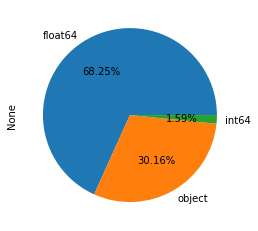

In [8]:
df.dtypes.value_counts().plot.pie(autopct = lambda x: str(round(x, 2)) + '%')

- Parmi les 63 variables , nous avons :
   - 69.84% d'attributs numériques dont :
      - 68.25% de type float (variable continue)
      - 1.59% de type int ( variable discret)
   - 30.16% d'attributs catégoriels
- La variable cible est : $churn$ qui est de type object (catégoriel)
  - Nous somme ainsi en présence d'un problème de classification 

##### Attribut qualitatif ou catégoriel

In [9]:
for col in df.select_dtypes('object'):
    print(f'{col :-<50} {df[col].unique()}')

genre--------------------------------------------- ['H' 'F' nan]
assurance_vie------------------------------------- ['non' 'oui' nan]
banque_principale--------------------------------- ['non' 'oui' nan]
compte_epargne------------------------------------ ['oui' 'non' nan]
credit_autres------------------------------------- ['consommation' nan 'permanent' 'bail']
cartes_bancaires---------------------------------- ['medium' 'premium' 'basic' nan]
compte_courant------------------------------------ ['oui' 'inconnu' 'non' nan]
compte_joint-------------------------------------- ['non' 'inconnu' 'oui' nan]
PEA----------------------------------------------- ['non' 'inconnu' 'oui' nan]
assurance_auto------------------------------------ ['non' 'inconnu' 'oui' nan]
assurance_habitation------------------------------ ['oui' 'inconnu' 'non' nan]
credit_immo--------------------------------------- ['non' 'inconnu' 'oui' nan]
type---------------------------------------------- ['pro' nan 'perso']
compte_t

- La variable interet_compte_epargne_total doit être convertir en float 

##### Attribut numérique

In [10]:
for col in df.select_dtypes('int64'):
    print(f'{col :-<50} {df[col].unique()}')

id_client----------------------------------------- [3463 1869 3760 ... 3548 4991  330]


- La variable id_client doit être suprimer car elle ne nous apporte aucune information sur le churn

In [11]:
for col in df.select_dtypes('float64'):
    print(f'{col :-<50} {df[col].unique()}')

espace_client_web--------------------------------- [ 0.  1. nan]
anciennete_mois----------------------------------- [37. 72.  3.  4. 52. 41. 62. 17. 34. 38. 25.  1.  2.  8. 44. 51. 23. 45.
 63. 65. 48.  5. 61. 47. 66. 33. 46. 22. 64.  9. 21. 57. 43. nan 58. 12.
  7. 18. 26. 56. 71. 40. 11. 67. 50. 10. 13. 16. 70. 20. 39. 14. 36. 53.
 28. 54. 32. 24. 19. 31. 42. 68. 27. 29. 35. 15. 69. 30. 55. 60.  6. 59.
 49.  0.]
agios_6mois--------------------------------------- [91.15 24.1  73.6  ... 29.25 51.6  60.55]
age----------------------------------------------- [ 30.  53.  41.  44.  32.  57.  27.  71.  64.  28.  34.  49.  nan  67.
  63.  80.  86.  37.  54.  60.  20.  35.  66.  78.  59.  33.  81.  48.
  36.  38.  58.  29.  45.  56.  89.  47.  42.  40.  75.  61.  39.  22.
  73.  25.  77.  24.  23.  62.  31.  43.  26.  68.  79.  65.  46.  21.
  82.  84.  50.  72.  74. 103.  55.  70.  96.  94.  52.  85.  88.  76.
  69.  51.  93.  97.  83. 108.  90. 100.  95.  98. 107.  87.  92. 121.
  99.  91. 1

- La variable espace_client_web doit être convertir en object car il s'agit d'une variable binaire (0 ou 1)

Ramarque: toutes les variables sauf churn (variable cible) comportent des valeurs manquantes. 

###### Valeur manquantes

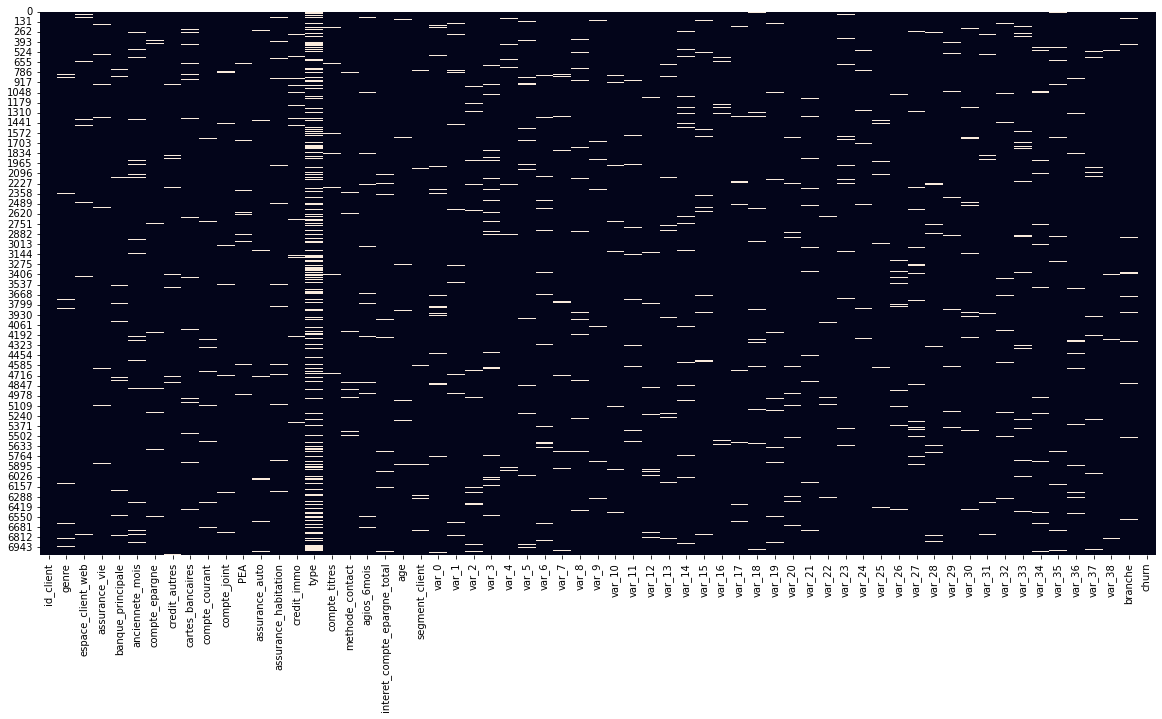

In [12]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)
plt.savefig(save_results_to + 'valeur_manquante.png')

In [13]:
((df.isna().sum()/df.shape[0])*100).sort_values(ascending=True)

id_client                        0.000000
churn                            0.000000
var_17                           1.703819
banque_principale                1.732216
var_6                            1.789010
var_8                            1.789010
credit_autres                    1.803209
espace_client_web                1.803209
genre                            1.817407
branche                          1.831606
var_12                           1.831606
compte_titres                    1.845804
interet_compte_epargne_total     1.845804
assurance_vie                    1.860003
var_35                           1.860003
compte_joint                     1.860003
var_13                           1.902598
var_11                           1.902598
var_33                           1.902598
anciennete_mois                  1.902598
var_36                           1.916797
var_25                           1.916797
var_7                            1.930995
assurance_auto                   1

- Le dataset contient beaucoup de valeurs manquantes 


  - la variable $type$ présente elle seule 25.66% de données manquantes 

##### Suppression de colonnes et changement de type de variables 

In [15]:
# convertion des variables 
df['interet_compte_epargne_total'] = pd.to_numeric(df['interet_compte_epargne_total'],errors = 'coerce')
df['espace_client_web']=df['espace_client_web'].astype('object')
# Supression de la colonne id_client
df=df.drop(['id_client'],axis=1)


In [16]:
df.describe(include='all')

,genre,espace_client_web,assurance_vie,banque_principale,anciennete_mois,compte_epargne,credit_autres,cartes_bancaires,compte_courant,compte_joint,PEA,assurance_auto,assurance_habitation,credit_immo,type,compte_titres,methode_contact,agios_6mois,interet_compte_epargne_total,age,segment_client,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,branche,churn
count,6915,6916.0,6912,6921,6909.000000,6894,6916,6893,6896,6912,6897,6907,6904,6906,5236,6913,6895,6896.000000,6902.000000,6889.000000,6886,6893.000000,6905.000000,6885.000000,6896.000000,6905.000000,6901.000000,6917.000000,6907.000000,6917.000000,6904.000000,6906.000000,6909.000000,6914.000000,6909.000000,6890.000000,6882.000000,6893.000000,6923.000000,6870.000000,6904.000000,6900.000000,6905.000000,6893.000000,6900.000000,6900.000000,6908.000000,6903.000000,6894.000000,6906.000000,6899.000000,6887.000000,6891.000000,6896.000000,6909.000000,6901.000000,6912.000000,6908.000000,6895.000000,6888.000000,6914,7043
unique,2,2.0,2,2,NaN,2,3,3,3,3,3,3,3,3,2,2,4,NaN,NaN,NaN,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2
top,H,0.0,non,non,NaN,oui,permanent,medium,non,non,non,non,non,non,pro,oui,mail,NaN,NaN,NaN,B2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NORD-EST,non
freq,3499,5791.0,3578,4854,NaN,6226,3330,3029,3424,3027,3034,3402,2752,2718,3794,4098,2315,NaN,NaN,NaN,720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1229,5174
mean,NaN,NaN,NaN,NaN,32.378926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761615,2284.702282,43.608506,NaN,7179.987046,9181.184842,11216.801336,13181.565491,15226.615127,17203.245908,19153.174193,21140.626041,23168.689721,25129.685065,27152.790413,29149.664388,31131.285760,33082.709767,35116.480254,37092.498762,39062.675576,41108.330364,43137.077894,45114.458351,1831.056165,2392.217585,3046.721499,3751.171018,4571.258256,5443.256338,6388.922336,7466.224002,8579.794540,9785.838628,11068.392722,12451.917950,13847.487586,15330.769094,16951.694375,18658.079824,20385.900574,22273.316999,24236.491341,NaN,NaN
std,NaN,NaN,NaN,NaN,24.572971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.101904,2267.269644,16.215077,NaN,5810.200728,6146.097003,6473.621085,6755.778274,7027.169215,7292.260550,7562.376616,7830.552550,8096.501519,8291.622737,8557.137340,8775.705207,8996.814535,9194.949816,9386.127780,9627.690317,9815.506594,9982.442626,10187.341371,10352.089926,1978.417804,2316.758870,2671.306401,2995.728149,3376.351826,3753.941923,4145.849633,4663.291697,5113.944501,5557.064049,6048.259593,6548.008325,7052.226589,7588.094743,8077.431652,8687.004053,9186.926461,9830.595029,10422.086601,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000,20.000000,NaN,0.767658,-4241.785944,-3519.347763,-3913.768064,-5409.713059,-3465.351758,-2841.348341,-904.308834,-2149.031436,-4337.062922,-5.206176,650.647378,3358.080715,3326.158824,6544.063228,6506.306202,7606.828103,9048.149110,12050.195361,12959.846404,1.194554,-90.450206,-111.756762,-50.767485,-33.384666,-206.422219,-25.344010,17.175309,-21.541673,-11.430930,31.496118,51.786562,258.614091,474.166678,1050.553067,1401.075175,1704.972375,1924.631757,2703.861155,NaN,NaN
25%,NaN,NaN,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,402.525000,31.000000,NaN,2711.797553,4684.731756,6636.687807,8445.162191,10366.064325,12137.799285,13967.773090,15702.524589,17668.219900,19472.685507,21332.220012,23216.232323,2502

- Genre: les clients de la banque sont en majorité des hommes. 
- espace_client_web: La plupart des clients n'utilisent pas ou n'ont pas accès à leur espace web 
- assurance_vie: Beaucoup de clients de la banque ne souscrivent pas à l'assurance vie
- banque_principale: La banque en question n'est pas la banque principale de la majorité de ses clients 
  - Ses clients possèdent potentiellement un autre compte ailleurs 
- anciennete_mois: Les clients de la banque ont: 
  - en moyenne 32 mois d'ancienneté 
  - le plus vieux client a 72 mois 
  - La banque attire également de nouveau client (min=0) mais en faible quantité (quantile 25% faible)
- compte_epargne: La plupart des clients de la banque possèdent un compte d'épargne 
- credit_autres: 3 types de crédits dont le plus fréquent est permanent
- cartes_bancaires:la banque propose 3 types de cartes bancaires à ses clients dont la majorité détiennent la carte medium
- compte_courant et compte_joint : Le compte en question n'est ni le compte courant, ni le compte joint  de la majorité des clients 
  - compte joint: c'est un compte entre époux ou entre plusieurs personnes 
- PEA: La mojorité des clients de cette banque ne possèdent pas de compte PEA
- assurance_auto, assurance_habitation et credit_immo: La plupart des clients ne souscrivent ni à l'assurance auto, ni à l'assurance habitation, ni au crédit immobilier
- type: deux types de compte client { personel, professionel} dont le plus fréquent est professionnel
  - les comptes courants professionnels,sont à usage des entreprises ou professionnels (entrepreneurs individuels, professions libérales, etc.).
- compte_titres: La majorité des clients de la banque possèdent un compte titre
- methode_contact: La banque dispose de 4 moyens {'mail' 'sms' 'courrier' 'telephone'} d'échangent avec les clients dont le plus utilisé est le mail
- agios_6mois: Les clients de la banque ont en moyenne un agios de 6 mois d'environ 65€ , l'agios minimale de 6 mois est de 18,25€ et le maximum de 118,75€. 
- interet_compte_epargne_total: En moyenne, les clients ont 2267.269644	€ d'interêt sur leur épargne dont la valeur maximun est de 8684.800000	€ et le min de 18.800000€
- âge: La moyenne d'age des clients de la banque est de 43 ans, le plus jeune client à 20 ans et le plus vieux à 121 ans
- branche: La banque est divisée en 6 branches dont celle ayant plus de clients est NORD-EST

- Beaucoup de variables anonymes contiennent des valeurs négatives






##### Analyse du Fond

##### Examen de la colonne target

In [17]:
def display_countplot(df: pd.DataFrame,col_x: str,title: str,hue: Union[None,str]=None):
  #Affichage du graphe permettant de dénombrer la parts de candidats de chaque catégorie d'une variable catégorielle
  
    temp = df.copy()
    nb_rows = temp.shape[0]
  
    #if col_x=='churn' or hue=='churn':
     #   temp['churn'] = np.where(temp['churn']==0,'non','oui')
  
    fig = plt.figure(figsize=(11,6))
  
  # plot grouped bar chart
    if hue is None:
        splot = sns.countplot(temp[col_x])
    else:
        splot = sns.countplot(temp[col_x],hue=temp[hue])
    splot.set_title(title,fontsize=20)
    plt.ylabel('Nombre de clients', fontsize=16)

  #Affichage des proportions au dessus des barplots
    for p in splot.patches:
        splot.annotate(format((p.get_height()/nb_rows), '.4f'),
                      (p.get_x()+ p.get_width()/ 2., p.get_height()),
                      ha = 'center',
                      va = 'center',
                      xytext = (0, 7),
                      textcoords = 'offset points')

/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


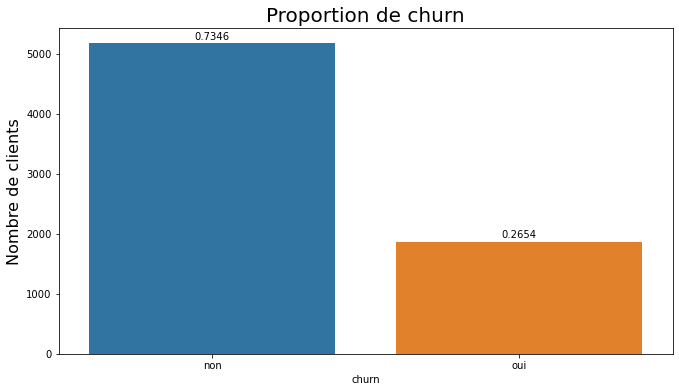

In [18]:
display_countplot(data,'churn',"Proportion de churn")
#plt.savefig(save_results_to + 'Proportion_de_churn.png',dpi = 300)

Le jeu de donnée n'est pas équilibré il va falloir en tenir compte dans la construction du modèle.
- 73.46% restent dans la banque
- 26.54% quittent la banque 

##### 1. Variables numériques

###### histogrames des variables continues

/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with simil

/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with simil

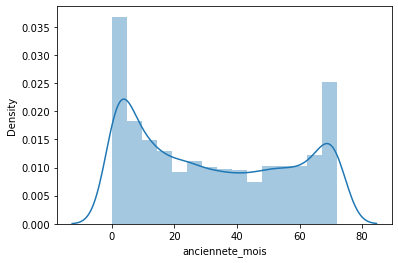

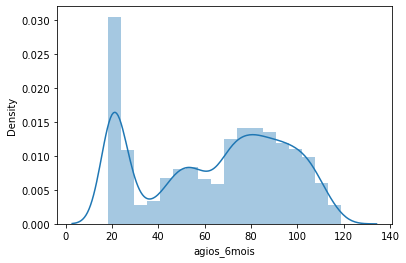

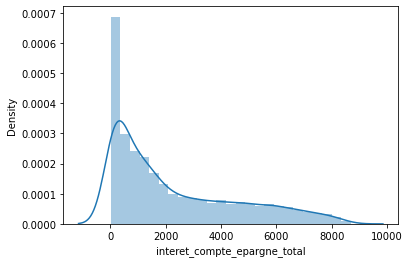

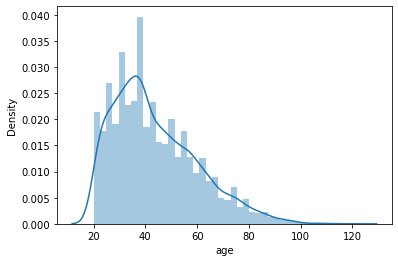

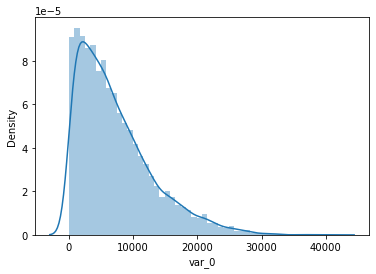

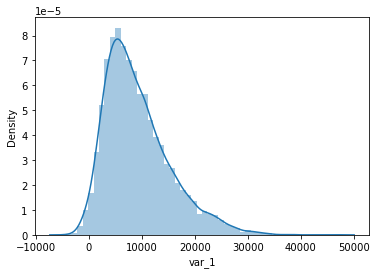

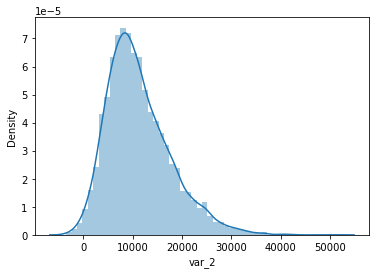

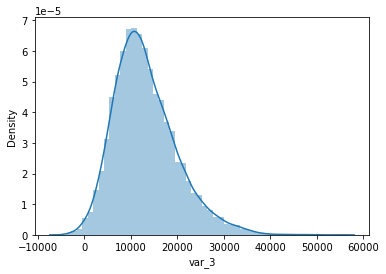

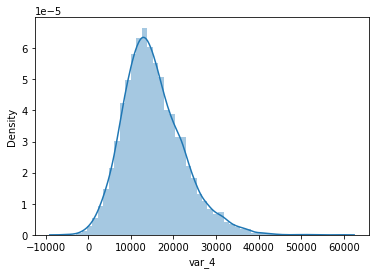

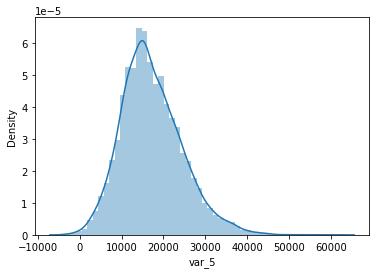

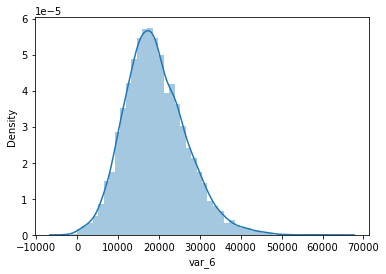

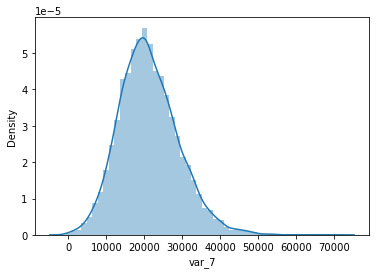

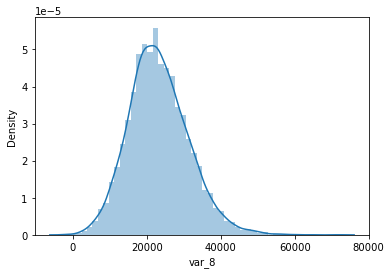

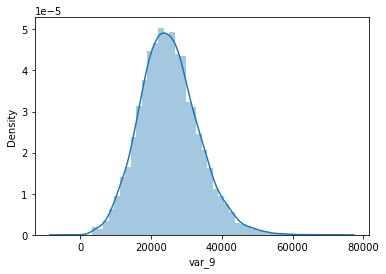

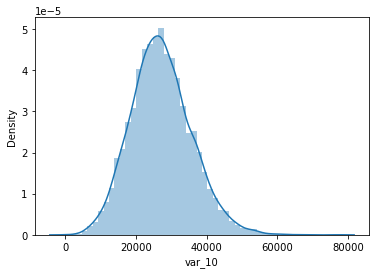

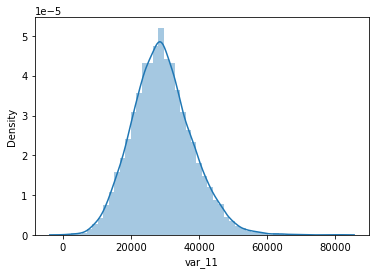

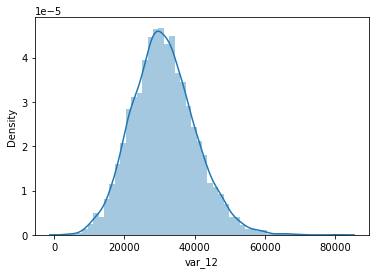

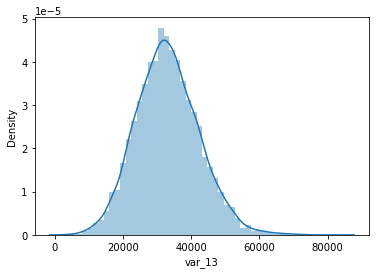

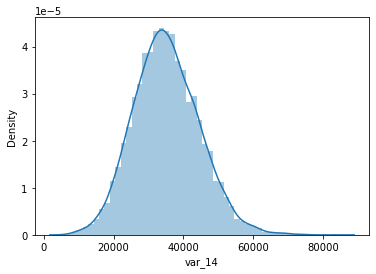

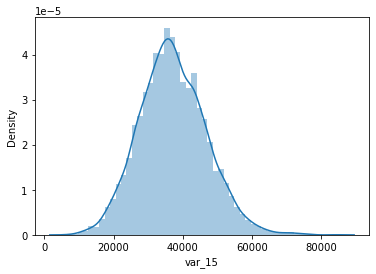

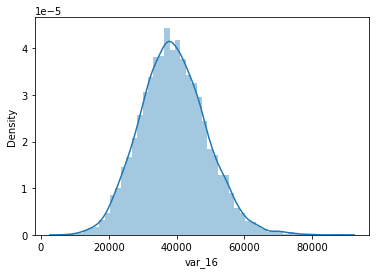

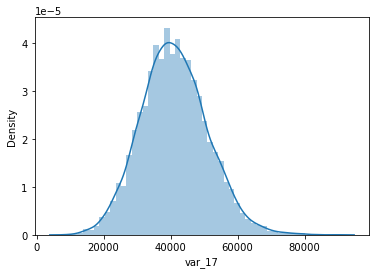

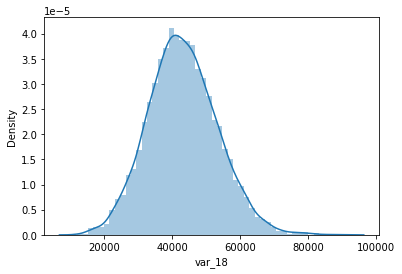

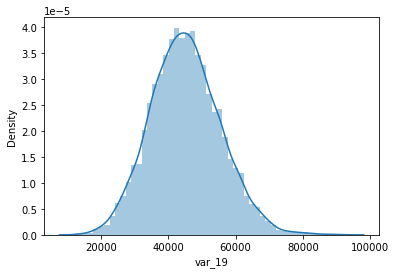

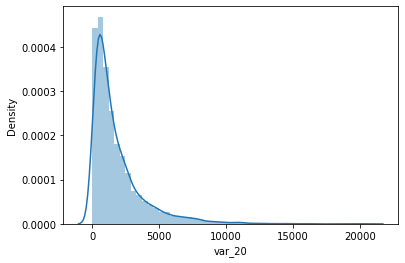

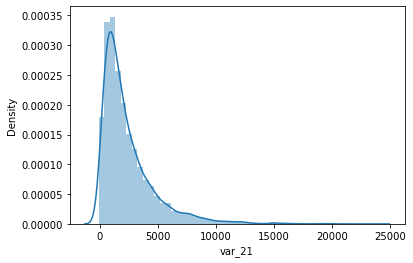

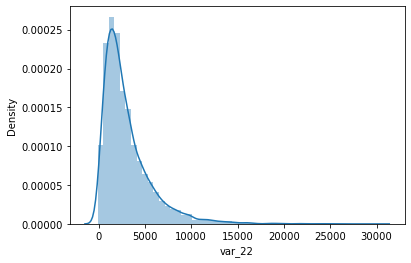

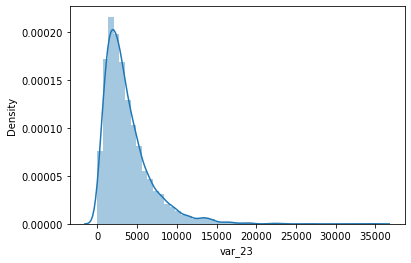

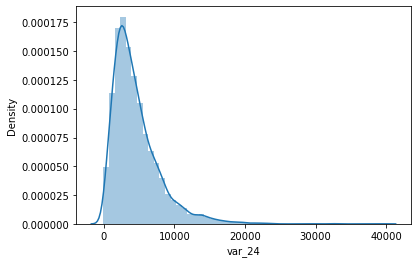

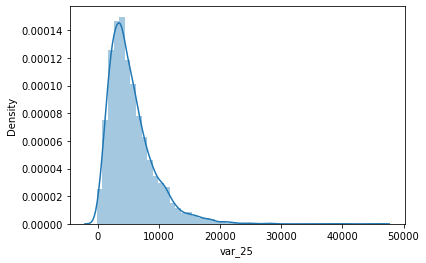

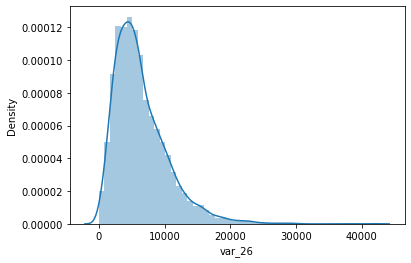

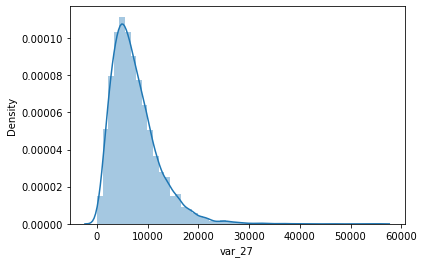

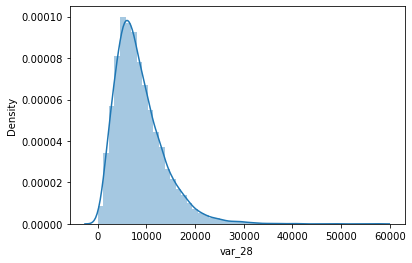

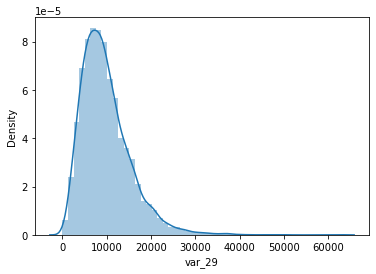

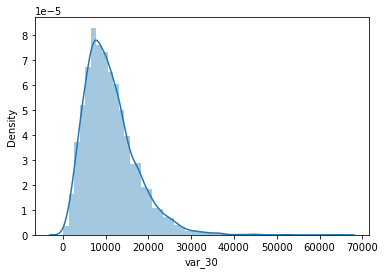

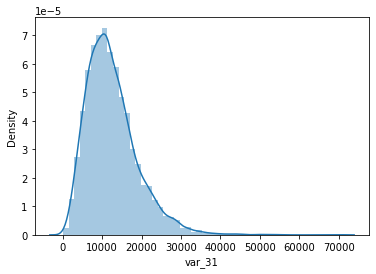

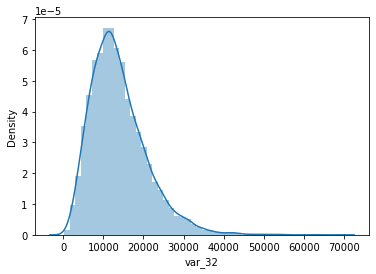

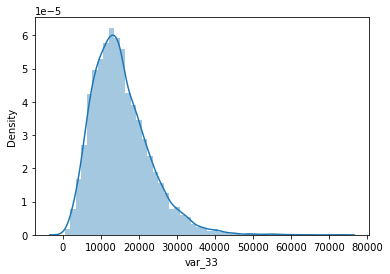

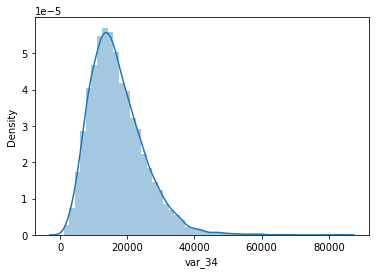

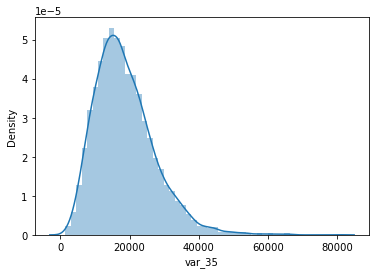

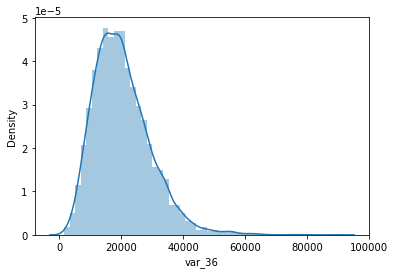

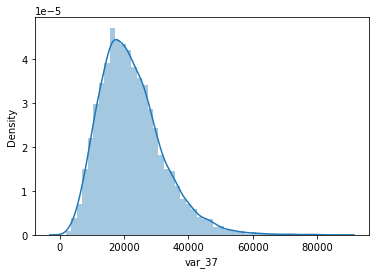

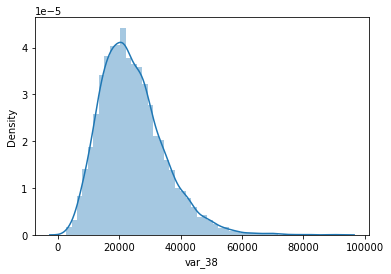

In [19]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.distplot(df[col])

- On remarque que la distribution des variables anomyme est assymétrique (de façon général avec un skweness positif  car les queues de distributions sont étalées vers la droite ) .
   
- De plus,les deux variables age et interet_compte_epargne_total présentent aussi un skewness positif  
- NB: Cette assymétrie de distribution implique de potentiel valeurs extrêmes  majoritairement à droite.  

 ##### Vérification des valeurs extrêmes

In [20]:
def display_boxplot(df: pd.DataFrame, numerical_cols: list):

  #Affichage des boxplot des variables numériques
    plt.figure(figsize=(20,60))
    i = 0
    for columns_ in numerical_cols:
        i = i+1
        plt.subplot(13, 3, i)
        box = sns.boxplot(x=df[columns_], data=df)
      #box.set_title(str(columns_),fontsize=15)

In [21]:
num_df=df[['age','anciennete_mois','agios_6mois','interet_compte_epargne_total']]

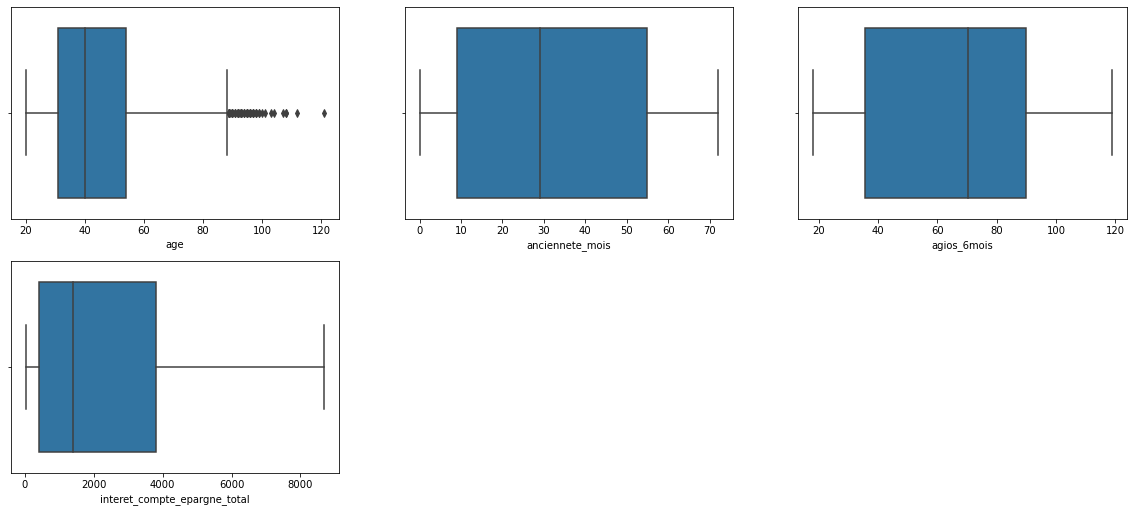

In [22]:
num_cols = list(num_df.columns)
display_boxplot(df,num_cols)

- On remarque bien que la variable age admet des valeurs aberrantes , je vais les supprimer dans la suite.

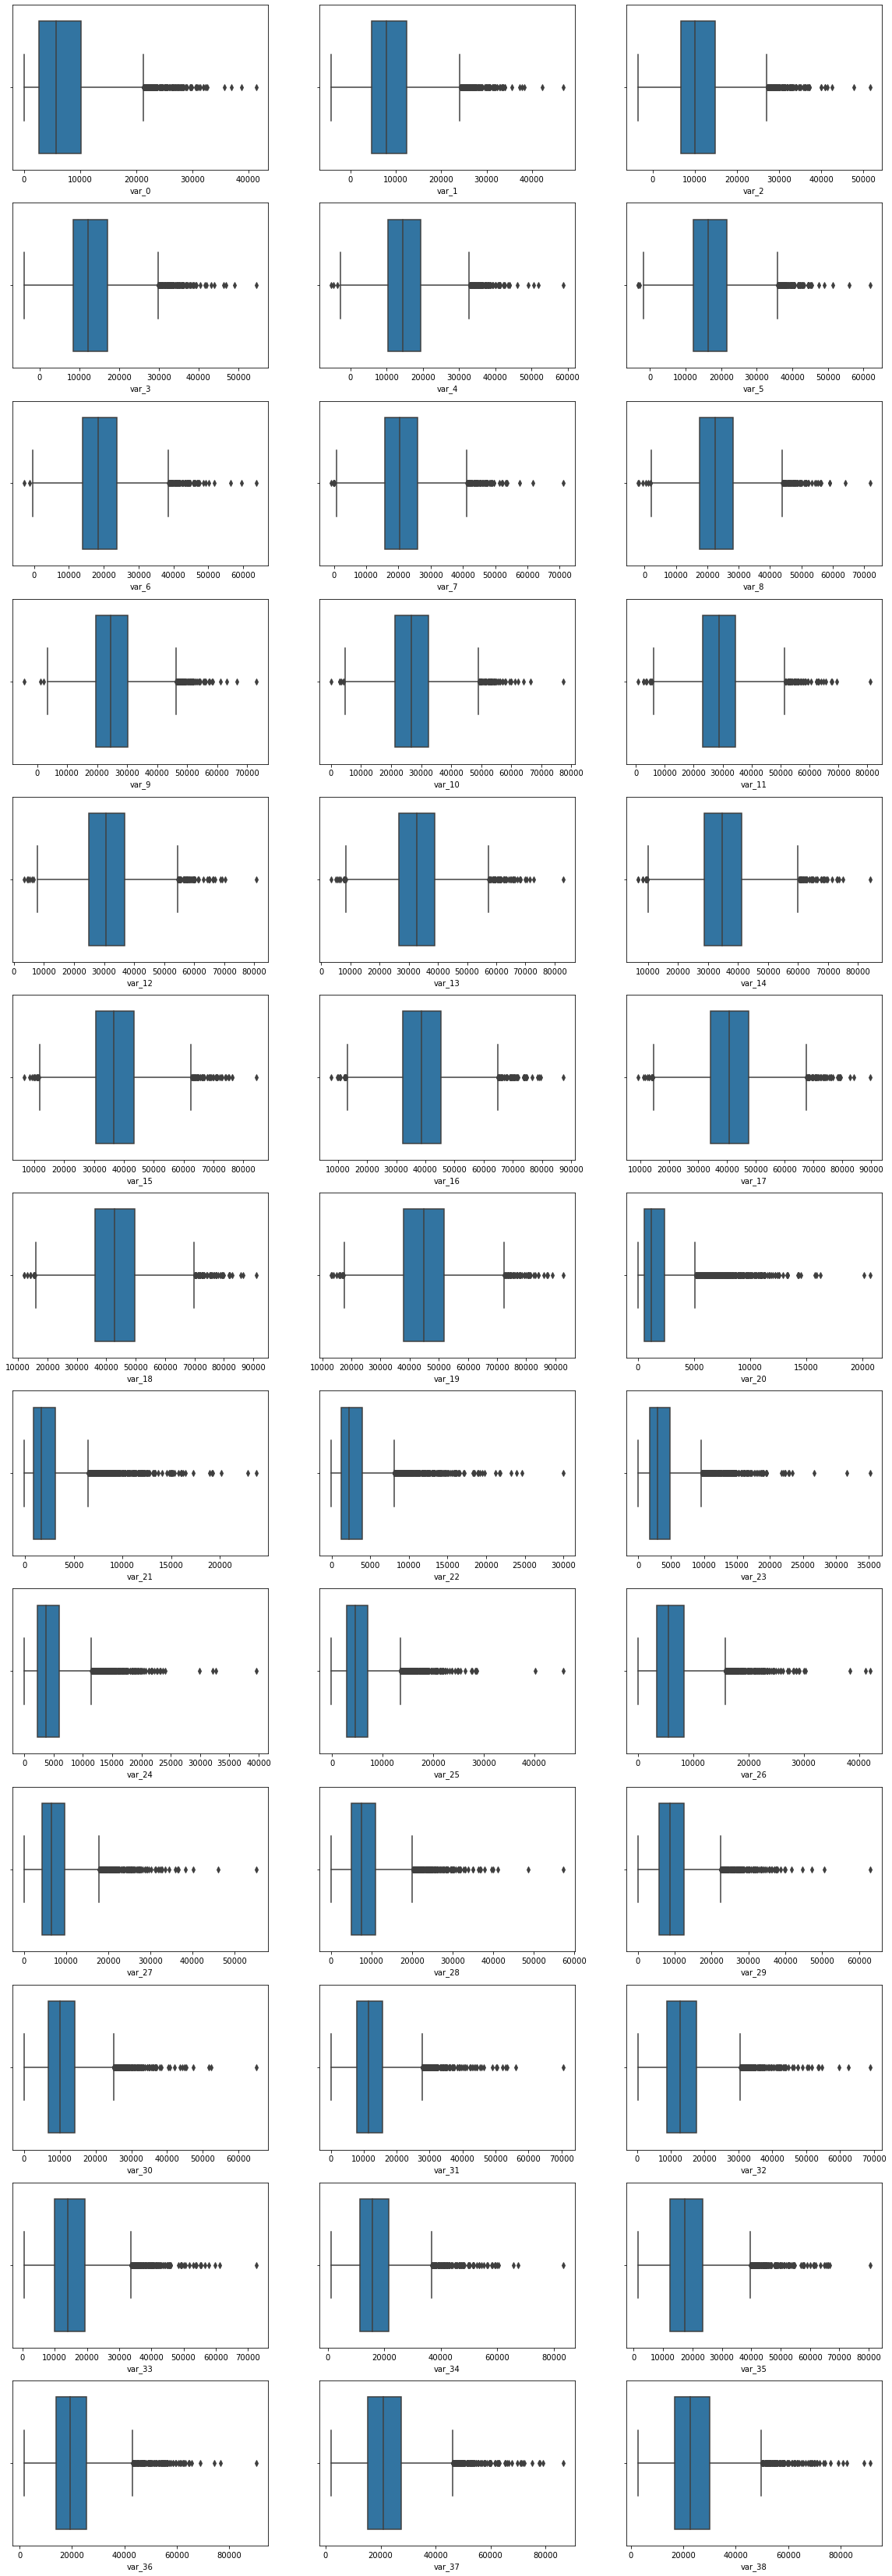

In [23]:
num_df_var_=df[[feature for feature in df.columns if feature.startswith('var_')]]

#num_df = df.select_dtypes(include="float64")
num_cols_var_ = list(num_df_var_.columns)
display_boxplot(df,num_cols_var_)

- Toutes les variables anonymes possèdent de valeurs aberrantes.

#### Relation Target / Variable numérique

In [24]:
df['churn']=df['churn'].apply(lambda x : 1 if x=='oui' else 0)

In [25]:
def display_boxplot_differenciate(df: pd.DataFrame,numerical_cols: list,target: str):
    temp = df.copy()
    plt.figure(figsize=(18,6))
    i = 0
    if target=='churn':
        temp['churn'] = np.where(temp['churn']==0,'non','oui')
    for columns_ in numerical_cols:
        i = i+1
        plt.subplot(1, 4, i)
        box = sns.boxplot(x=temp[target], y=temp[columns_], data=temp)
        box.set_title(f"{columns_} vs {target}",fontsize=15)

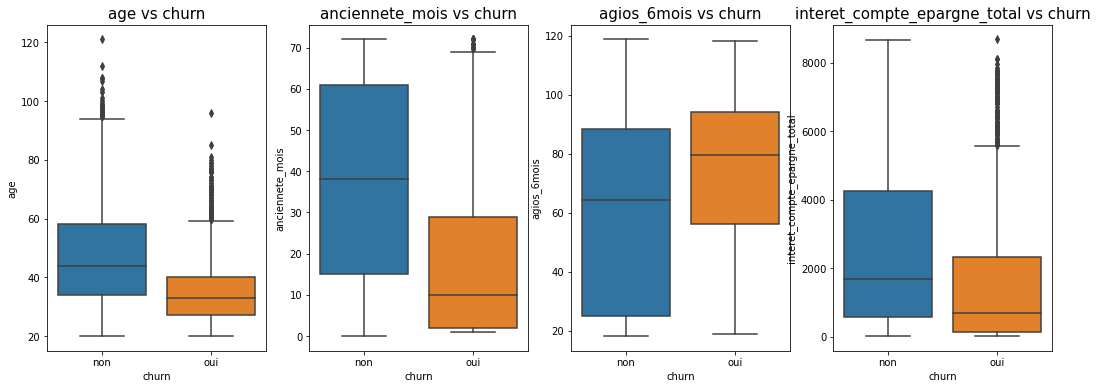

In [26]:
display_boxplot_differenciate(df,num_cols,"churn")

Au vu de ce grahique, on peut dire que les clients qui quittent la banque ont les caractéristiques suivantes:
- Il s'agit des personnes moins agées  age< 40 ans 
- Appartenant nouvellement à la banque (nouveau client)

L'entreprise doit mettre l'accent sur les nouveaux clients ayant une ancienneté supérieure à 10 mois.
- Ayant un agios de 6 mois elevé 
- Ayant un intérêt de compte d'épargne faible 

##### Corrélation

In [27]:
def pair_plot(df: pd.DataFrame, numerical_cols: list, target: Union[None,str]=None):
  #Affichage des corrélations deux à deux des variables numériques différencié par la variable embauche
    plt.figure(figsize=(10,10))
    if target is not None:
        numerical_cols.append(target)
        sns.pairplot(df[numerical_cols],height = 2, hue=target)
        numerical_cols.remove(target)
    else:
        sns.pairplot(df[numerical_cols],height = 2)

<Figure size 720x720 with 0 Axes>

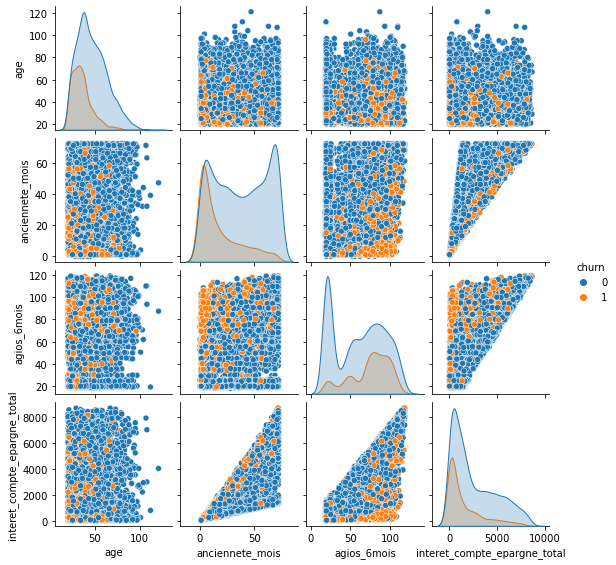

In [28]:
pair_plot(df,num_cols,target='churn')

- La variable interet_compte_epargne_total semble être correlée aux variables anciennete_mois et agios_6mois  

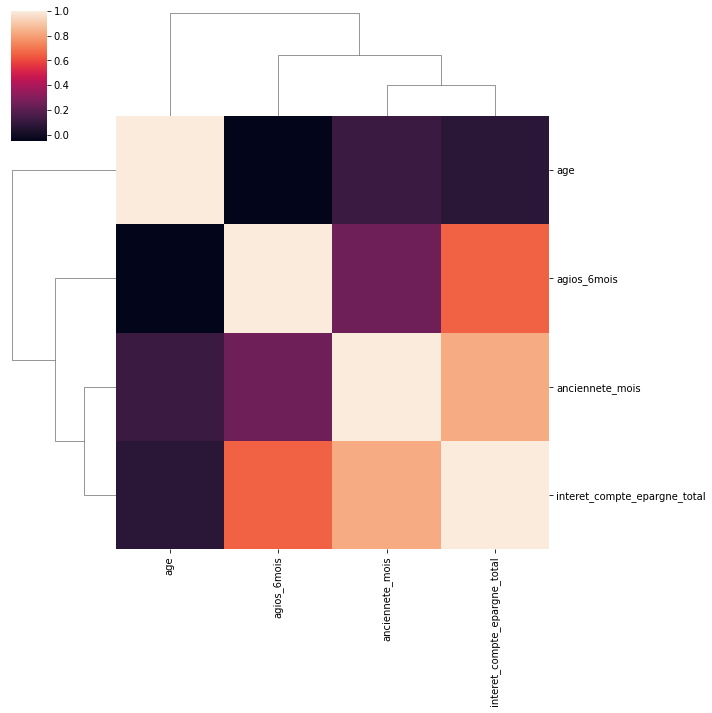

In [29]:
sns.clustermap(num_df.corr())

In [30]:
#df['churn']=df['churn'].apply(lambda x : 1 if x=='oui' else 0)
matrix_corr=df.corr()
matrix_corr['churn'].sort_values(ascending=False)

churn                           1.000000
agios_6mois                     0.194814
var_19                         -0.154372
var_18                         -0.156179
var_37                         -0.157470
var_38                         -0.157721
var_17                         -0.159151
var_16                         -0.162443
var_36                         -0.163025
var_14                         -0.168932
var_15                         -0.169758
var_34                         -0.171175
var_35                         -0.172625
var_33                         -0.173686
var_13                         -0.175662
var_32                         -0.179820
var_11                         -0.181446
var_31                         -0.181692
var_12                         -0.184484
var_10                         -0.189710
var_30                         -0.189833
var_9                          -0.194267
var_29                         -0.197917
var_26                         -0.198237
interet_compte_e

- On remarque que la corrélation des variables numériques avec la target est assez faible , on note notamment trois groupes de corrélation:
  - Premier groupe: 
    - Les variables age et anciennete_mois sont correlées faiblement de façon négative  avec la variable churn (corrélation supérieure à 0.3 en valeur absolue) 
  - Deuxième groupe:
     - Les ensembles de variables {agio_6mois},{interet_compte_epargne_total} et {var_0 ,var_20} ont une corrélation faible (négative et positive avec la target. Cette corarrélation est de 0.2 environ en valeur absolue.
        - Les variables anonymes var_0 et var_20 ont toutes les deux une corrélation négative 
        - Tandisque les variables agio_6mois et interet_compte_epargne_total ont une corrélation positive et négative respectivement.
  - Troisième groupe: 
       - Les autres variables anonymes à part les deux du deuxième groupe ne présentent pas de corrélation significative avec la target. 
      
- Remarque : toutes les variables anonymes ont une corrélation négative avec la target (corrélation pas significatve).

In [31]:
matrix_corr=df.corr()
matrix_corr['var_0'].sort_values(ascending=False)

var_0                           1.000000
var_1                           0.946395
var_20                          0.929375
var_2                           0.901050
var_21                          0.898456
var_22                          0.869783
var_3                           0.861757
var_23                          0.841095
var_4                           0.823675
var_24                          0.811351
var_5                           0.794062
var_25                          0.783266
var_26                          0.769546
var_6                           0.765118
var_27                          0.741283
var_7                           0.738923
var_28                          0.724552
var_8                           0.716507
var_29                          0.697392
var_9                           0.690347
var_30                          0.682260
var_10                          0.670565
var_31                          0.667666
var_11                          0.659770
var_32          

#### ### ## Voir le fichier Réduction de dimension.ipynb pour l'étude des variables anonymes

##### Suppresion des outliers (valeurs aberrantes)

In [32]:
def compute_IQR_find_outliers(df: pd.DataFrame,cols: list):

  #Calcul de l'interval interquartile et suppression des valeurs extreme

    Q1 = df[cols].quantile(0.25)
    Q3 = df[cols].quantile(0.75)
    IQR = Q3 - Q1
    IQR_min = Q1 - 1.5 * IQR
    IQR_max = Q3 + 1.5 * IQR
  
    df_out = df[~((df[cols] < IQR_min) | (df[cols] > IQR_max)).any(axis=1)]
  
    return df_out

In [33]:
col_numerique=num_cols + num_cols_var_

In [34]:
df= compute_IQR_find_outliers(df,col_numerique)

In [35]:
df.shape

(6108, 62)

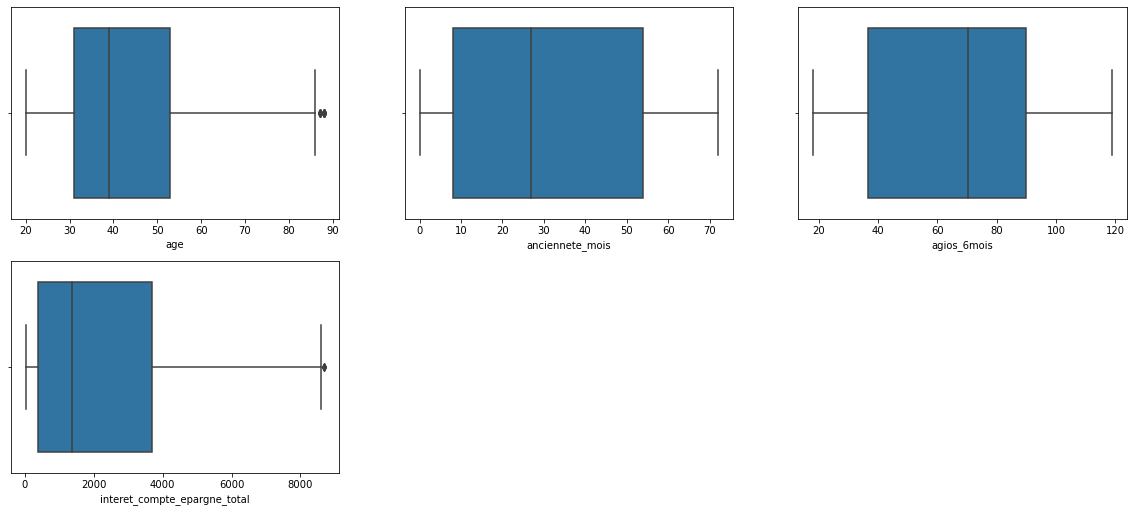

In [36]:
display_boxplot(df,num_cols)

/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


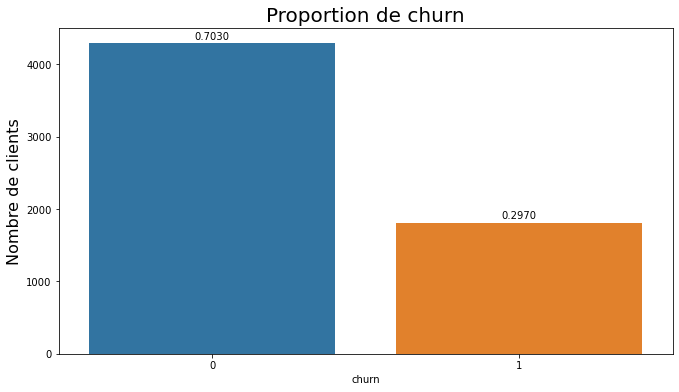

In [37]:
display_countplot(df,'churn',"Proportion de churn")

Malgré la suppression de certaines observations on a presque les mêmes proportions des deux classes (churn/non churn) dans le dataset.
- 70.30% (non churn)
- 30.70% (churn) 

In [38]:
def display_barplot_differenciate(df: pd.DataFrame, numerical_cols: list, target: str):
    temp = df.copy()
    plt.figure(figsize=(35,8))
    i = 0
    temp.churn  = temp.churn.astype("int")
    for columns_ in numerical_cols:
        i = i+1
        if ("age") in numerical_cols:
            plt.subplot(2, 1, i)
        else:
            plt.subplot(4, 1, i)
        df_grouped = temp.groupby(columns_)[target].mean().reset_index()
        df_grouped = df_grouped[df_grouped[target]>0]
        bar = sns.barplot(x=df_grouped[columns_], y=df_grouped[target], data=df_grouped)
        bar.set_title(f"{columns_} vs {target}",fontsize=15)

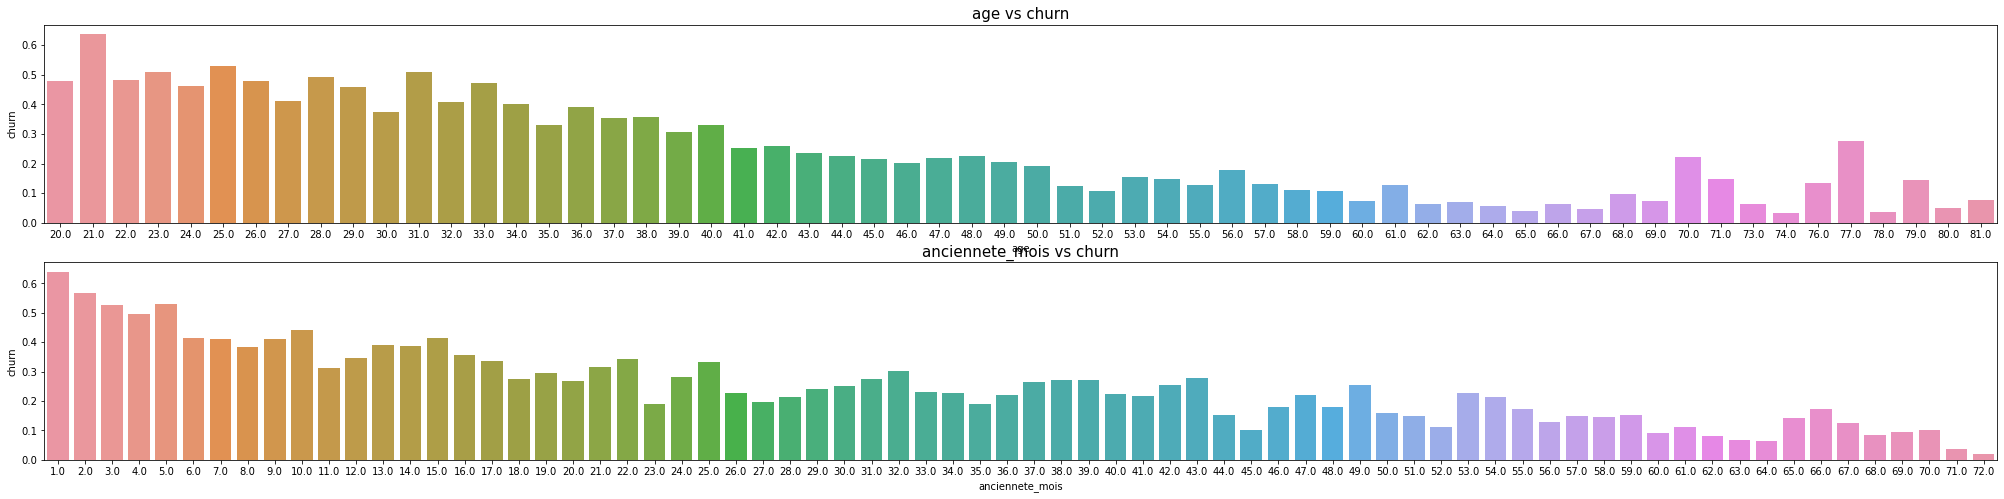

In [39]:
cols = ["age","anciennete_mois"]
display_barplot_differenciate(df,cols,"churn")

###### 2. Variables Qualitatives (Attributs catégoriels)

In [40]:
df_=data.copy()
# convertion des variables 
df_['interet_compte_epargne_total'] = pd.to_numeric(df_['interet_compte_epargne_total'],errors = 'coerce')
df_['espace_client_web']=df_['espace_client_web'].astype('object')
# Supression de la colonne id_client
df_=df_.drop(['id_client'],axis=1)


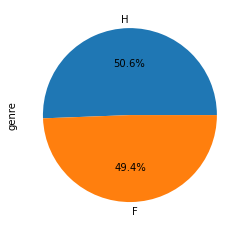

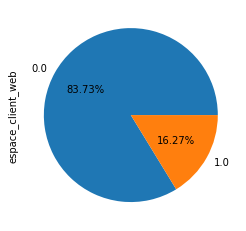

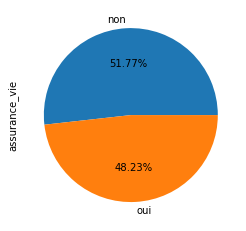

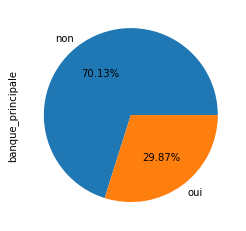

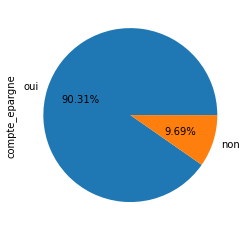

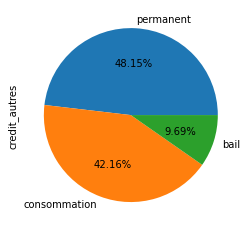

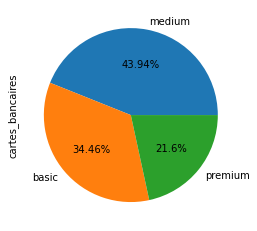

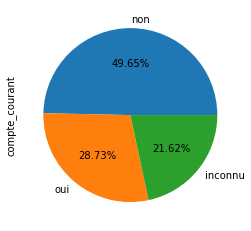

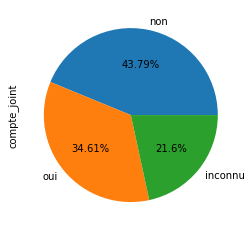

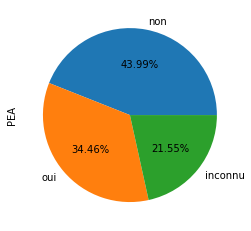

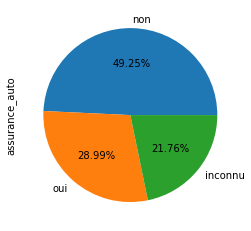

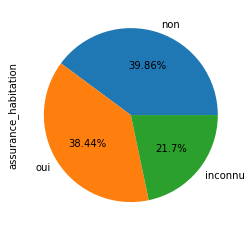

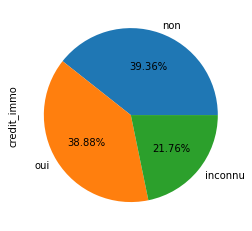

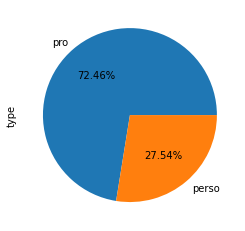

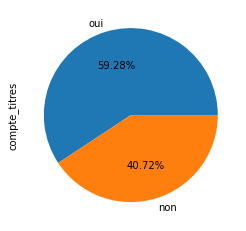

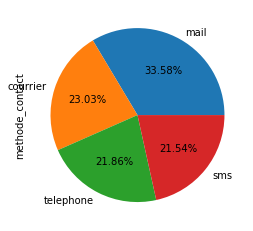

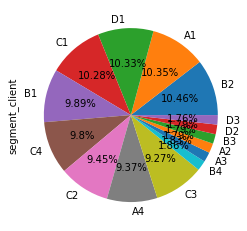

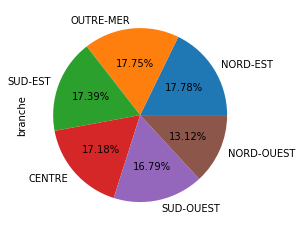

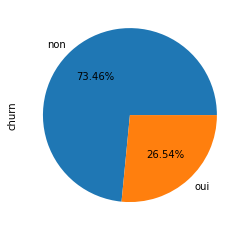

In [41]:
for col in df_.select_dtypes('object'):
    plt.figure()
    df_[col].value_counts().plot.pie(autopct = lambda x: str(round(x, 2)) + '%')

- Le dataset contient 50.6% d'hommes et 49.4% de femmes 
- 83.73% des client n'utilisent pas leur espace web 
- 51.77% ne souscrivent pas à l'assurance vie
- La banque en question n'est pas la banque principale des 70.13% des clients 
- 90.31% des clients de la banque ont un compte d'épargne
- Les autres crédit le plus fréquent est $permanent$ avec 48.15% suivi du crédit à la consommation avec 42.16% 
- 43.94% des clients ont la carte bancaire medium , suivi de basic avec 34.46% et premium avec 21.6% 
- Le compte n'est pas le compte courant de plus de la moitié des clients 
- 43.79% des comptes sont des comptes joints
- Seulement 34.46% des clients dispose d'un PEA
- Presque la moitié des clients (49.25%) ne souscrivent pas à l'assurance automobile
- Environ 40% des clients ne souscrivent pas non plus à l'assurance habitation
- 39.36% des clients ont un crédit immobilier
- 72.46% des titulaires de comptes sont des (entreprises, entrepreneurs etc)
- Plus de la moitié des clients ne disposent pas de compte titres
- 33.58% des clients communiquent par mail avec la banque , 22.03% par courrier, 21.86% par sms et 21.54% par telephone
- 10.46% des clients de la banque appartiennent au segment B2, ensuite 10.35% au segment A1
- 17.78% des clients de la banque sont au NORD-EST (plus élevé) et 13.12% au NORD-OUEST (plus faible)

###### Relation Target / Variables

###### Création de sous-ensembles churn  et no_churn

In [42]:
cat_df = df_.select_dtypes(include="object")
cat_df['churn']=cat_df['churn'].apply(lambda x : 1 if x=='oui' else 0)

/var/folders/w7/6rt7vbvd7bqbx0q2zdmnfvm40000gn/T/ipykernel_1237/486038690.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df['churn']=cat_df['churn'].apply(lambda x : 1 if x=='oui' else 0)


In [43]:
churn_df = cat_df[cat_df['churn'] == 1]

In [44]:
no_churn_df = cat_df[cat_df['churn'] == 0]

In [45]:
cat_df

,genre,espace_client_web,assurance_vie,banque_principale,compte_epargne,credit_autres,cartes_bancaires,compte_courant,compte_joint,PEA,assurance_auto,assurance_habitation,credit_immo,type,compte_titres,methode_contact,segment_client,branche,churn
0,H,0.0,non,non,oui,consommation,medium,oui,non,non,non,oui,non,pro,oui,mail,A4,NORD-OUEST,0
1,H,0.0,oui,oui,oui,consommation,premium,inconnu,inconnu,inconnu,inconnu,inconnu,inconnu,NaN,non,sms,B1,NORD-OUEST,0
2,H,0.0,non,non,oui,NaN,medium,non,non,oui,non,non,non,pro,oui,sms,B2,NORD-OUEST,0
3,H,1.0,oui,non,oui,consommation,medium,oui,oui,oui,oui,NaN,oui,pro,oui,sms,C4,NORD-OUEST,0
4,F,0.0,non,non,oui,permanent,medium,non,non,non,non,non,non,pro,non,mail,B2,NORD-OUEST,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,F,0.0,non,non,oui,permanent,basic,oui,oui,oui,non,non,non,pro,non,mail,C4,CENTRE,0
7039,F,0.0,oui,oui,oui,consommation,medium,non,non,non,oui,non,oui,perso,oui,telephone,B1,CENTRE,0
7040,H,0.0,non,non,oui,consommation,medium,oui,non,non,oui,non,oui,perso,non,sms,C4,OUTRE-MER,0
7041,F,0.0,non,non,oui,permanent,medium,oui,oui,oui,non,oui,oui,perso,oui,mail,A1,SUD-OUEST,1


###### Relation Target / Variables catégorielles

In [46]:
pd.crosstab(df['churn'], df['branche'])

branche,CENTRE,NORD-EST,NORD-OUEST,OUTRE-MER,SUD-EST,SUD-OUEST
churn,,,,,,
0,728,768,506,763,745,705
1,294,290,311,310,289,285


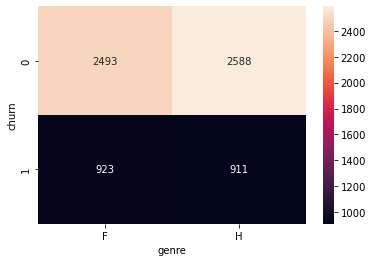

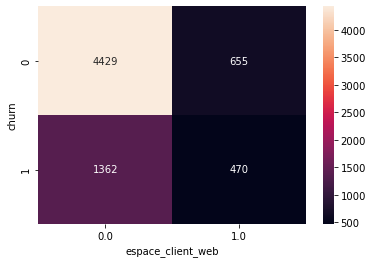

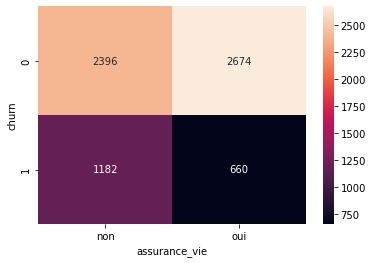

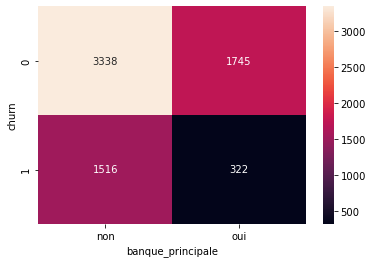

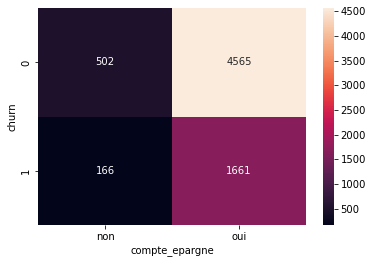

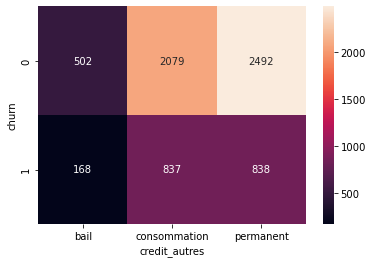

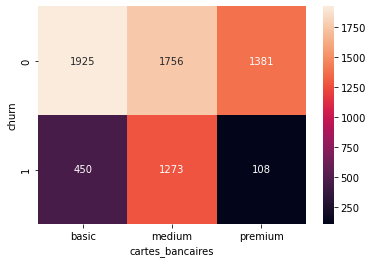

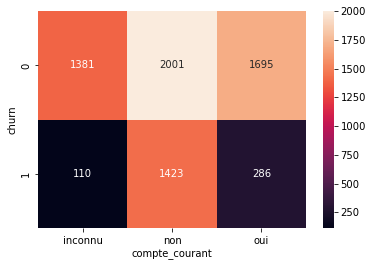

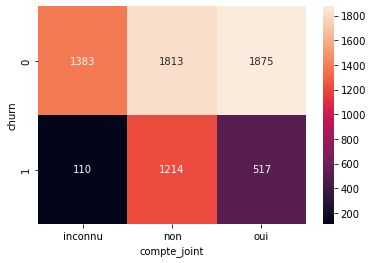

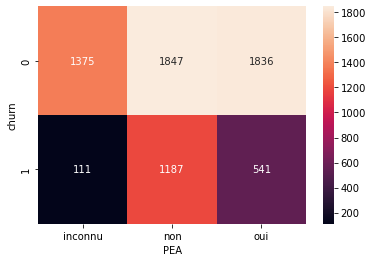

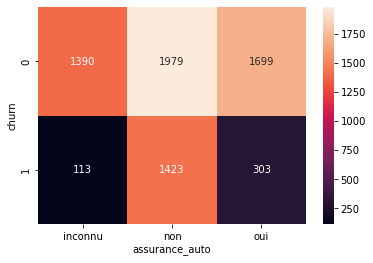

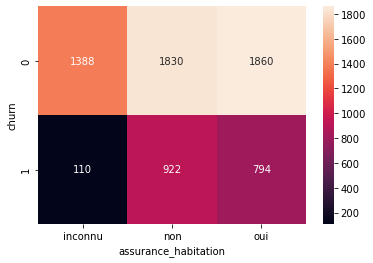

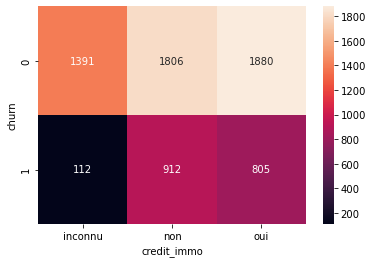

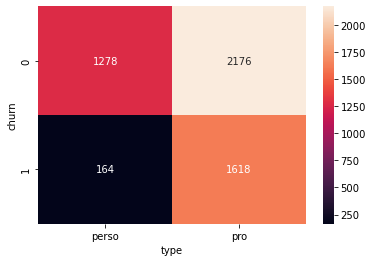

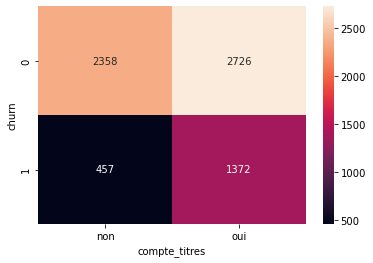

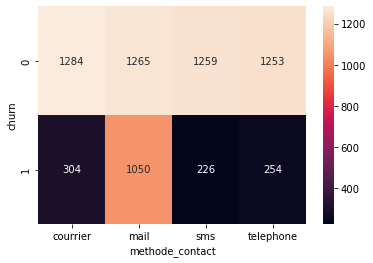

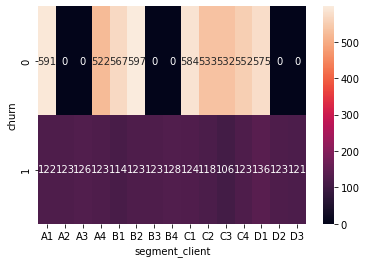

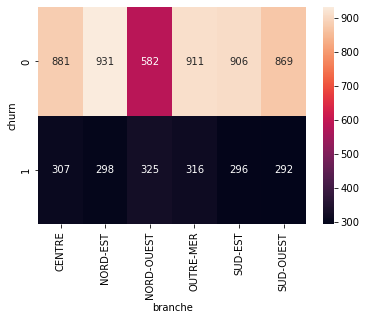

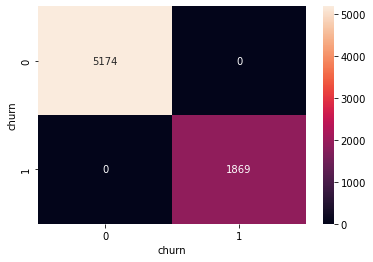

In [47]:
for col in cat_df:
    plt.figure()
    sns.heatmap(pd.crosstab(cat_df['churn'], cat_df[col]), annot=True, fmt='d')

##### Corrélation

Nous allons étudier les corrélations entre les variables quatilitatives avec le test de Cramer.

Le test de corrélation de cramer V nous montre l'intensité dans la relation entre deux variables catégorielles.

In [48]:
def cramersv_corr(x: pd.Series, y: pd.Series):
  #Calcule de la corrélation de cramers V entre deux variables catégorielles
    confusion_matrix = pd.crosstab(x,y)
    chi2 = scipy.stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

def cramer_matrix(categoricals: pd.DataFrame) -> pd.DataFrame:
  #Fonction permettant de construire une matrice à partir du calcul des coefs de correlation de cramers V
    categ_col_name = categoricals.columns
    n_var = len(categ_col_name)
    correlation_matrix = pd.DataFrame(np.ones((n_var, n_var)),
                                    index=categ_col_name,
                                    columns=categ_col_name)
    for name1, name2 in itertools.combinations(categ_col_name, 2):
        if name1 == name2:
            cramer_coef = 1
        else:
            cramer_coef = cramersv_corr(categoricals[name1],
                                                categoricals[name2])
        correlation_matrix.loc[name1, name2] = cramer_coef
        correlation_matrix.loc[name2, name1] = cramer_coef
    return correlation_matrix

In [49]:
coor_mat = cramer_matrix(cat_df)
cm = sns.light_palette("blue", as_cmap=True)
coor_mat.style.background_gradient(cmap=cm)

,genre,espace_client_web,assurance_vie,banque_principale,compte_epargne,credit_autres,cartes_bancaires,compte_courant,compte_joint,PEA,assurance_auto,assurance_habitation,credit_immo,type,compte_titres,methode_contact,segment_client,branche,churn
genre,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005507,0.000000,0.011096,0.000000,0.000000
espace_client_web,0.000000,1.000000,0.010661,0.211377,0.000000,0.145722,0.269225,0.215408,0.185037,0.184699,0.226244,0.187187,0.191693,0.087750,0.156352,0.196734,0.081435,0.024335,0.151796
assurance_vie,0.000000,0.010661,1.000000,0.448363,0.012759,0.143512,0.000000,0.150883,0.153448,0.164392,0.126810,0.133974,0.123417,0.178600,0.008418,0.158419,0.100998,0.000000,0.148827
banque_principale,0.000000,0.211377,0.448363,1.000000,0.000000,0.011978,0.180444,0.195220,0.161687,0.156305,0.182001,0.148803,0.138487,0.158026,0.107202,0.144354,0.093349,0.000000,0.161429
compte_epargne,0.000000,0.000000,0.012759,0.000000,1.000000,0.999926,0.454203,0.174468,0.172561,0.171463,0.177927,0.181025,0.178146,0.000000,0.010852,0.000000,0.000000,0.023560,0.000000
credit_autres,0.000000,0.145722,0.143512,0.011978,0.999926,1.000000,0.398651,0.232269,0.244700,0.249420,0.231673,0.260731,0.263640,0.025039,0.166448,0.167158,0.000000,0.008135,0.035872
cartes_bancaires,0.000000,0.269225,0.000000,0.180444,0.454203,0.398651,1.000000,0.724270,0.707092,0.707005,0.722912,0.716512,0.716039,0.177263,0.377079,0.314112,0.141507,0.026626,0.324236
compte_courant,0.000000,0.215408,0.150883,0.195220,0.174468,0.232269,0.724270,1.000000,0.718812,0.717476,0.733481,0.707776,0.708153,0.269349,0.340538,0.305271,0.145192,0.020554,0.346326
compte_joint,0.000000,0.185037,0.153448,0.161687,0.172561,0.244700,0.707092,0.718812,1.000000,0.719127,0.720223,0.715089,0.713418,0.235971,0.319202,0.283098,0.117595,0.002494,0.293072
PEA,0.000000,0.184699,0.164392,0.156305,0.171463,0.249420,0.707005,0.717476,0.719127,1.000000,0.726500,0.733968,0.736229,0.272785,0.321240,0.286112,0.103971,0.010042,0.279149


D'après ce graphique, il ressort que les 7 variables quanlitatives  :cartes_bancaires,compte_courant,compte_joint,PEA,	assurance_auto,assurance_habitation et credit_immo sont fortement corrélées entre elles avec une corrélation d'au moins 70% . Par contre elles sont faiblement corrélées avec la variable target.

D'autres part , seul la variable segment_client à une corrélation significative avec le churn (corrélation supérieure à 50%).


In [50]:
cramersv_corr(cat_df['segment_client'],cat_df['churn'])

0.576457785518639

/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


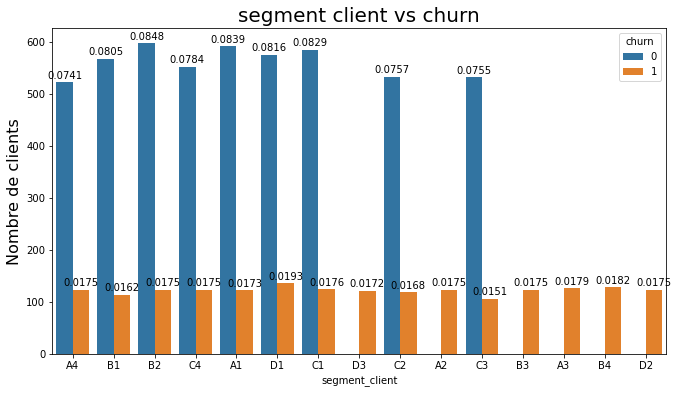

In [51]:
display_countplot(cat_df,'segment_client',"segment client vs churn",hue="churn")

/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'segment_client vs agios_6mois')

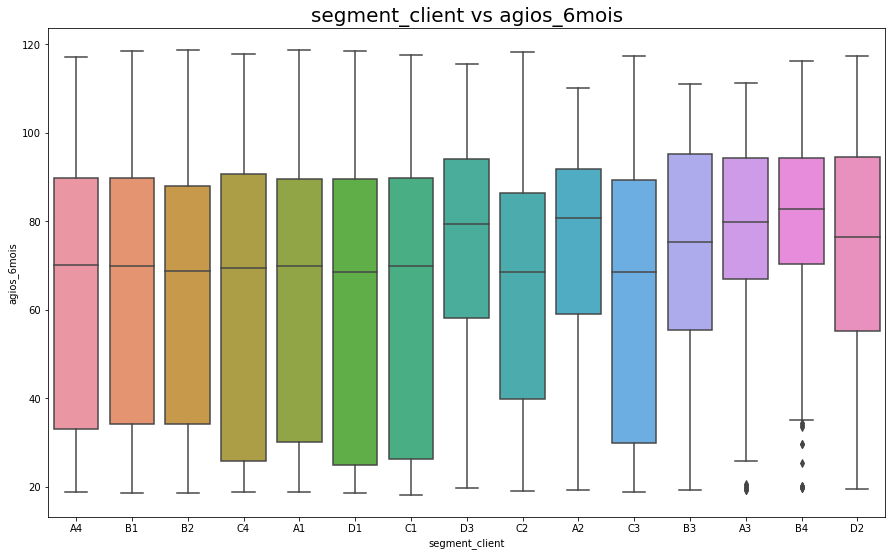

In [52]:
plt.figure(figsize=(15,9))
box = sns.boxplot("segment_client","agios_6mois",data=data)
box.set_title('segment_client vs agios_6mois',fontsize=20)

/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'segment_client vs anciennete_mois')

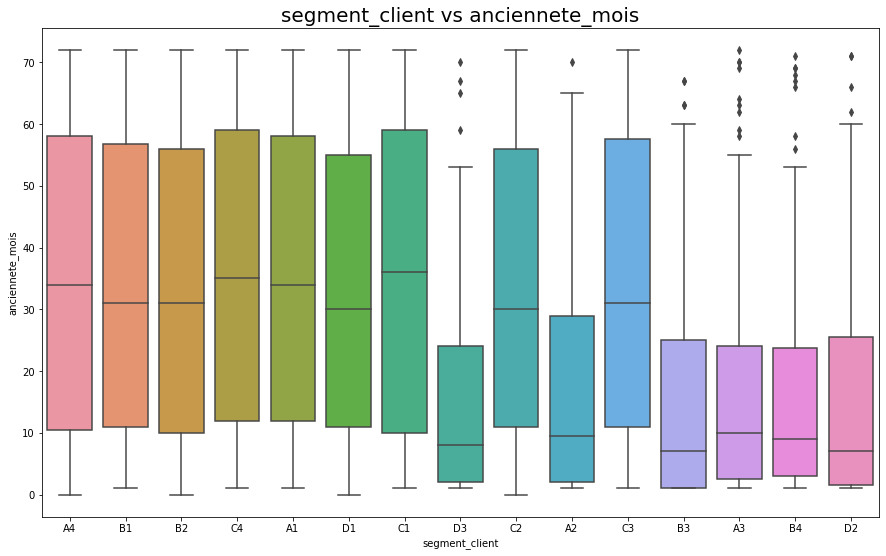

In [53]:
plt.figure(figsize=(15,9))
box = sns.boxplot("segment_client","anciennete_mois",data=data)
box.set_title('segment_client vs anciennete_mois',fontsize=20)

- Remarques: Les clients appartenant aux segments [A2,A3,B3,B4,D2,D3] quittent tous la banque.

L'agios de 6 mois des clients des segments [A2,A3,B3,B4,D2,D3] est plus elévé par rapport aux autres segments. En effet, la moyenne de leur agios de 6mois est beaucoup supérieure à la moyenne des agios de 6mois des autres segments.

Un agios de 6 mois elevé pousse les clients à quitter la banque.

Les clients qui quittent la banque ont en moyenne 9 à 12 mois d'ancienneté. Et il s'agit principalement des clients moins agés.

Les clients du segment B2 restent car leur agios de 6mois est le plus petit parmi les  maximum d'agios. 



/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


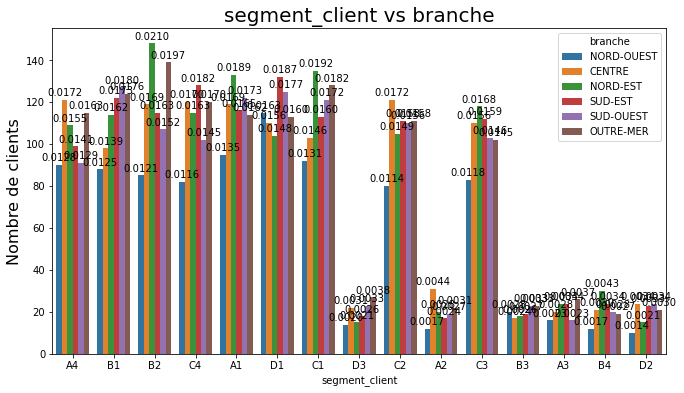

In [54]:
display_countplot(cat_df,'segment_client',"segment_client vs branche",hue="branche")

###### Y a-t-elle une dépendance statistiquement significative entre la carte bancaire et le churn ?

/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


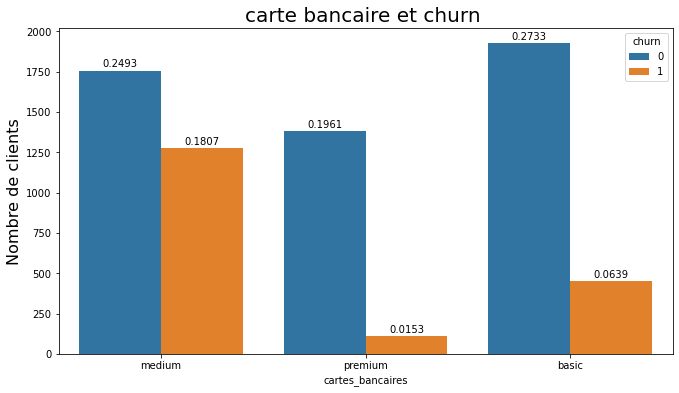

In [55]:
display_countplot(cat_df,'cartes_bancaires',"carte bancaire et churn ",hue="churn")

/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'cartes_bancaires vs agios_6mois')

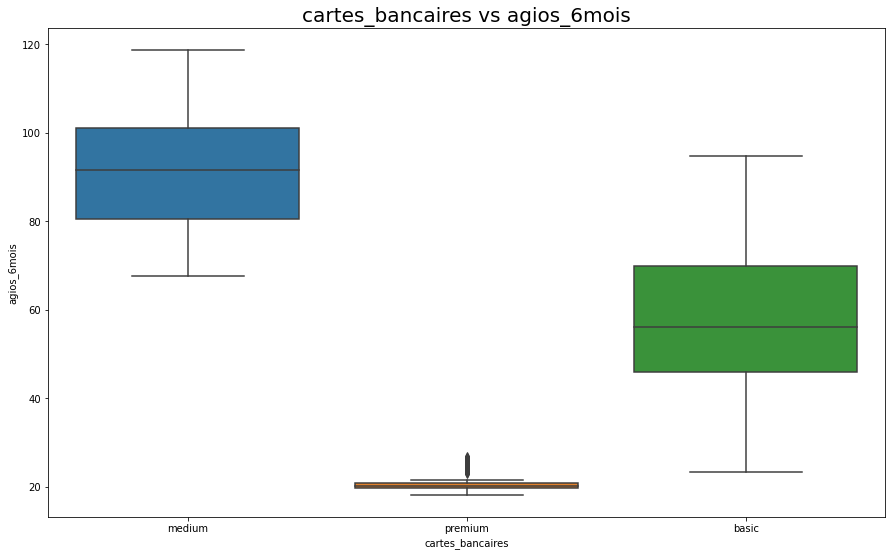

In [56]:
plt.figure(figsize=(15,9))
box = sns.boxplot("cartes_bancaires","agios_6mois",data=data)
box.set_title('cartes_bancaires vs agios_6mois',fontsize=20)

Les cartes bancaires premium et basic sont potentiellement plus avantageux pour les clients.

/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


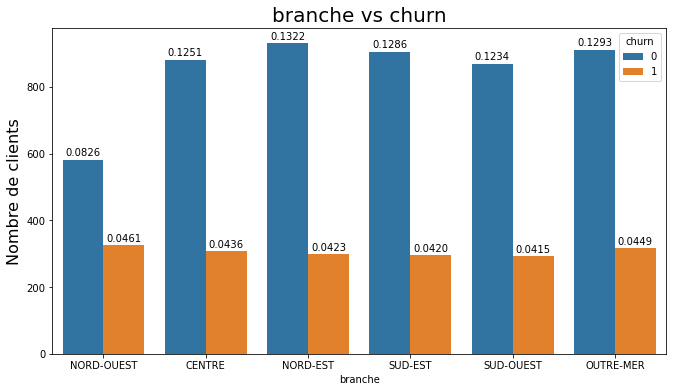

In [57]:
display_countplot(cat_df,'branche',"branche vs churn",hue="churn")

/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'branche vs agios_6mois')

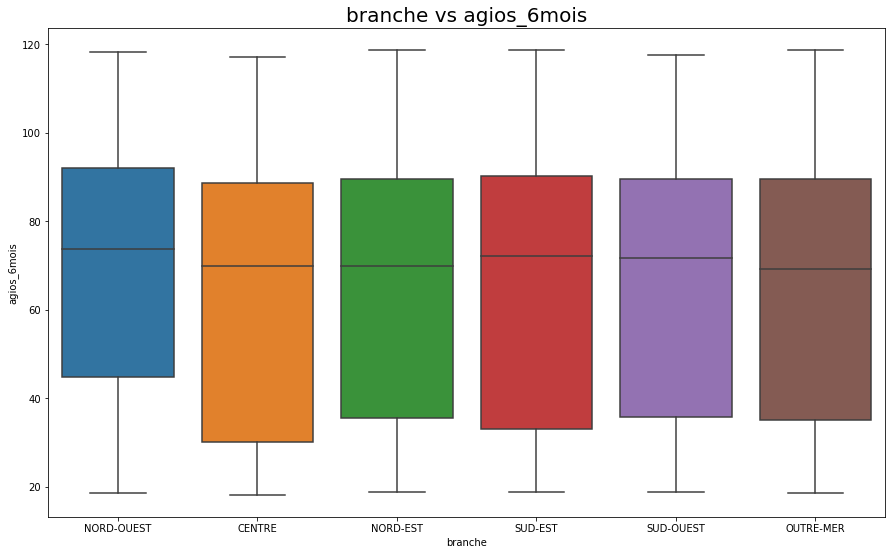

In [58]:
plt.figure(figsize=(15,9))
box = sns.boxplot("branche","agios_6mois",data=data)
box.set_title('branche vs agios_6mois',fontsize=20)

Les branches NORD-OUEST, SUD-EST et SUD-OUEST ont une moyenne d'agios de mois 6mois plus elevé que les autres.

/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


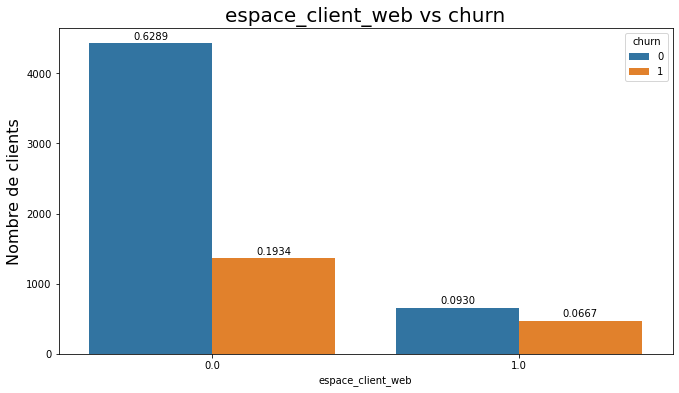

In [59]:
display_countplot(cat_df,'espace_client_web',"espace_client_web vs churn",hue="churn")

/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


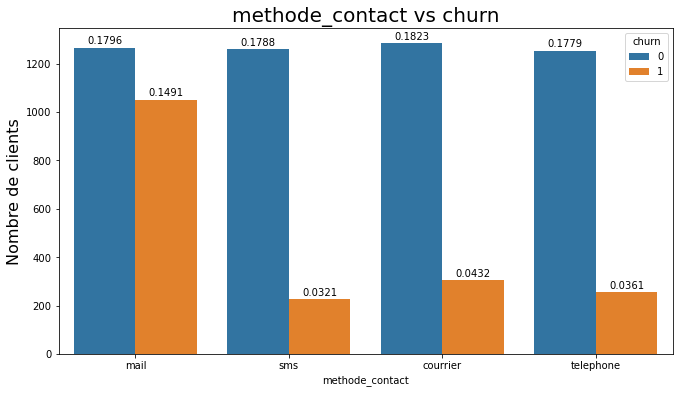

In [60]:
display_countplot(cat_df,'methode_contact',"methode_contact vs churn",hue="churn")

###### Analyse des variables de placement fiancier

/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


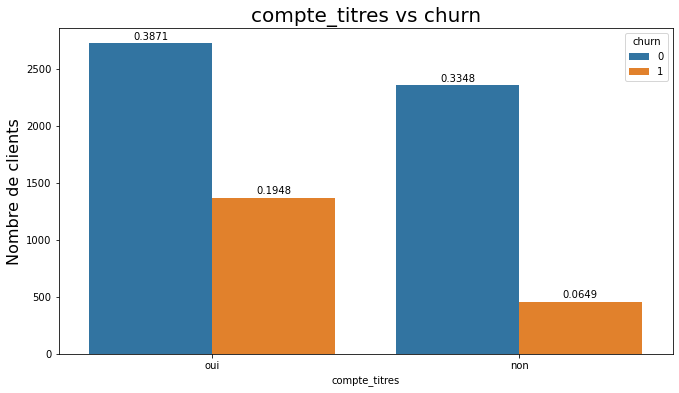

In [61]:
display_countplot(cat_df,'compte_titres',"compte_titres vs churn",hue="churn")

/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


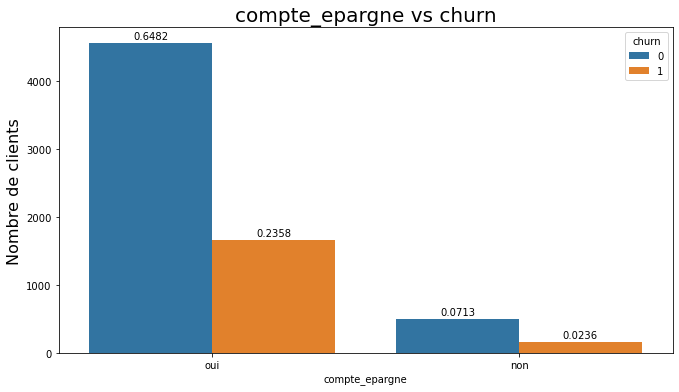

In [62]:
display_countplot(cat_df,'compte_epargne',"compte_epargne vs churn",hue="churn")

/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


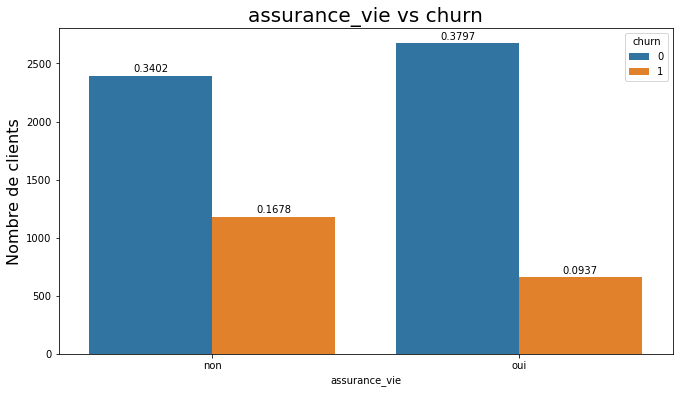

In [63]:
display_countplot(cat_df,'assurance_vie',"assurance_vie vs churn",hue="churn")

/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


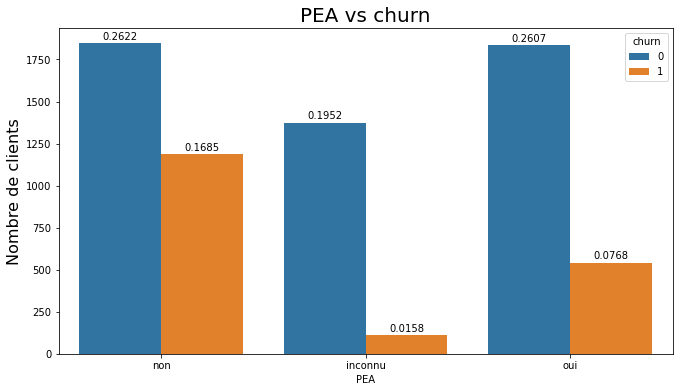

In [64]:
display_countplot(cat_df,'PEA',"PEA vs churn",hue="churn")

In [65]:
def display_boxplot_differenciate_placement(df: pd.DataFrame,placement_cols: list,target: str):
    temp = df.copy()
    plt.figure(figsize=(25,6))
    i = 0
    for columns_ in placement_cols:
        i = i+1
        plt.subplot(1, 4, i)
        box = sns.boxplot(x=temp[columns_], y=temp[target], data=temp)
        #box.set_title(f"{columns_} vs {target}",fontsize=15)

In [66]:
placement_cols=['compte_epargne','compte_titres','assurance_vie','PEA']

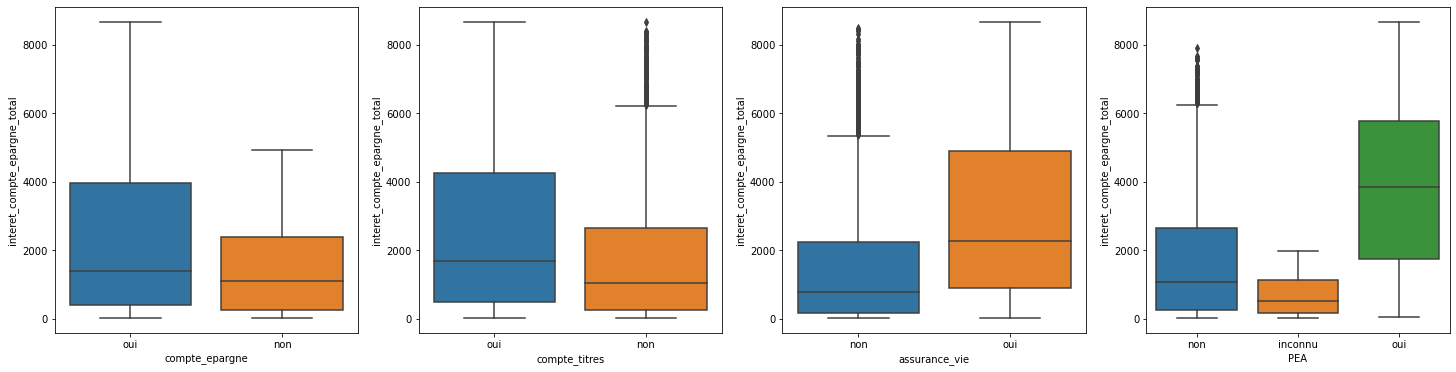

In [67]:
display_boxplot_differenciate_placement(df,placement_cols,'interet_compte_epargne_total')

- Les produits financiers comme l'assurance vie et le PEA, permettent aux clients de la banque d'augmenter leur revenu mais n'influencent pas sur la variable cible.

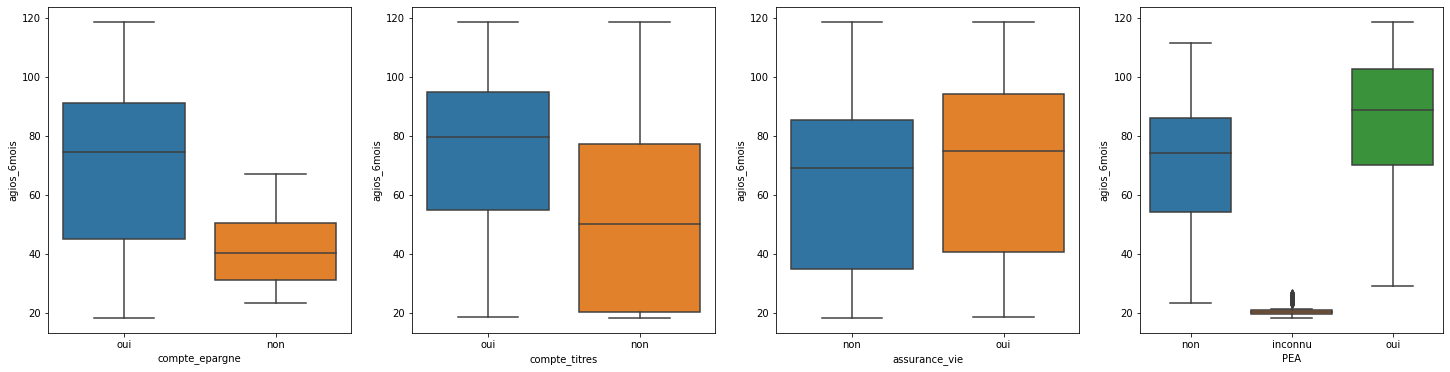

In [68]:
display_boxplot_differenciate_placement(df,placement_cols,'agios_6mois')

###### Analyse des variables de type crédit et assurance

In [69]:
var_cre_ass=['assurance_auto','assurance_habitation','credit_immo','credit_autres']

/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


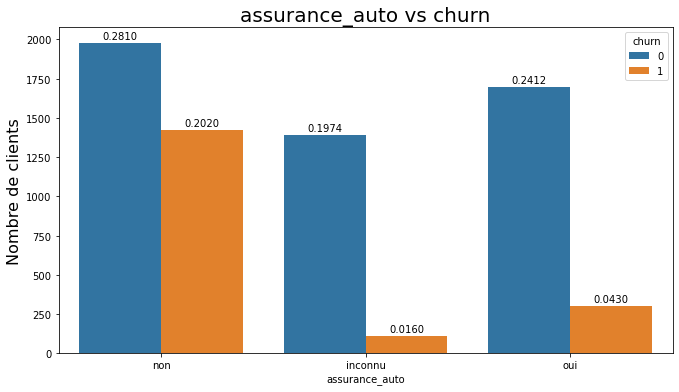

In [70]:
display_countplot(cat_df,'assurance_auto',"assurance_auto vs churn",hue="churn")

/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


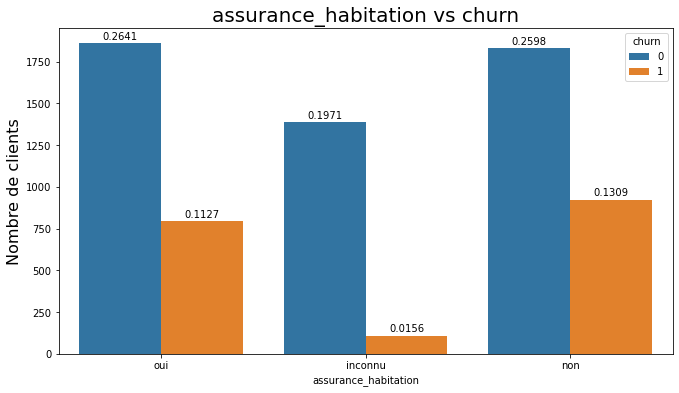

In [71]:
display_countplot(cat_df,'assurance_habitation',"assurance_habitation vs churn",hue="churn")

/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


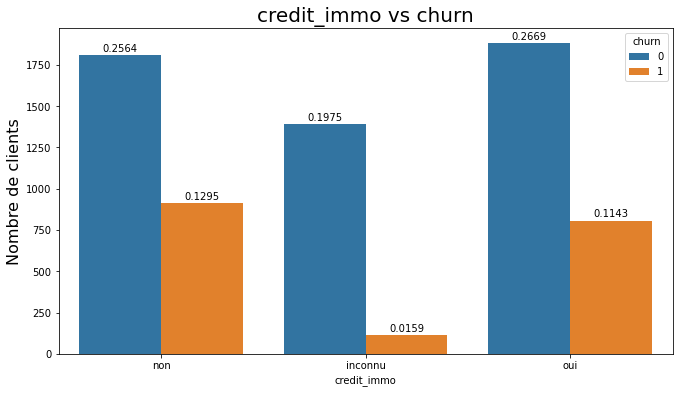

In [72]:
display_countplot(cat_df,'credit_immo',"credit_immo vs churn",hue="churn")

/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


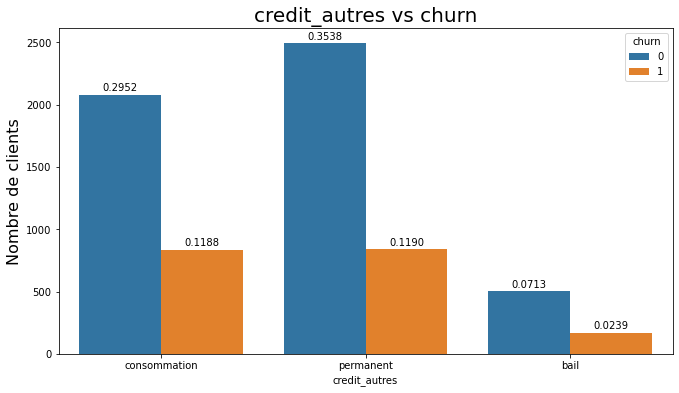

In [73]:
display_countplot(cat_df,'credit_autres',"credit_autres vs churn",hue="churn")

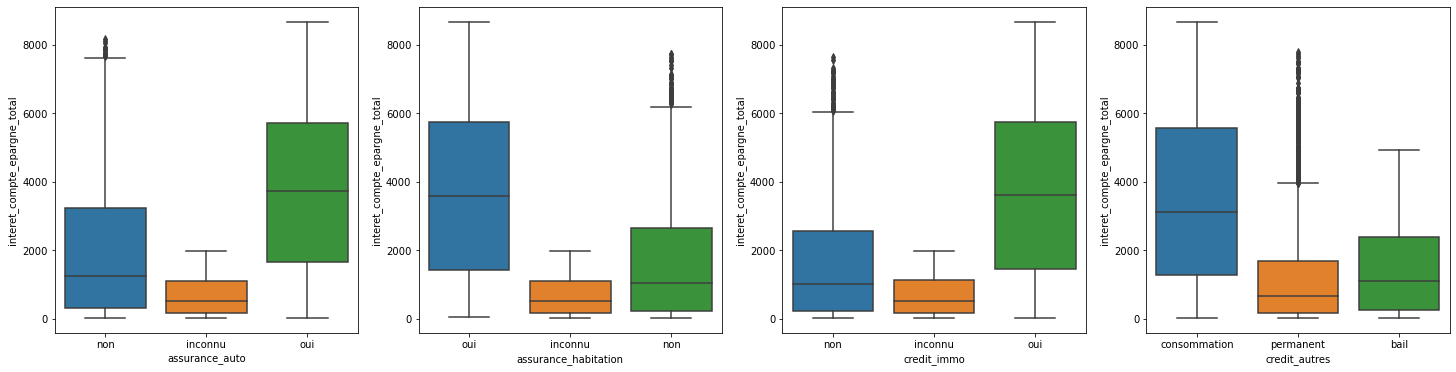

In [74]:
display_boxplot_differenciate_placement(df,var_cre_ass,'interet_compte_epargne_total')

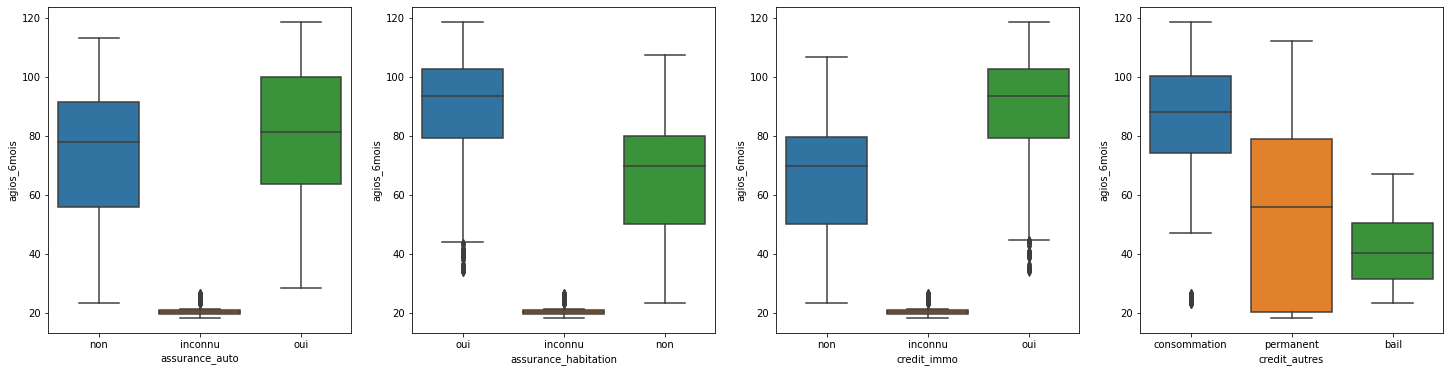

In [75]:
display_boxplot_differenciate_placement(df,var_cre_ass,'agios_6mois')

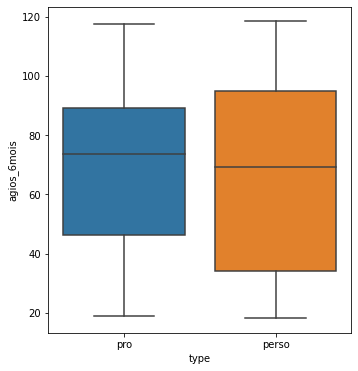

In [76]:
display_boxplot_differenciate_placement(df,['type'],'agios_6mois')

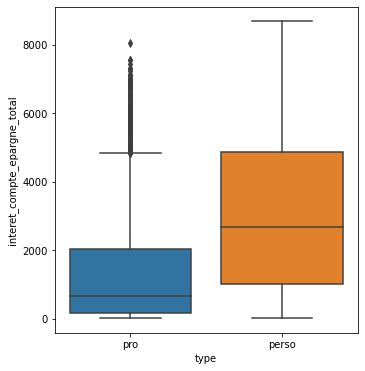

In [77]:
display_boxplot_differenciate_placement(df,['type'],'interet_compte_epargne_total')

/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


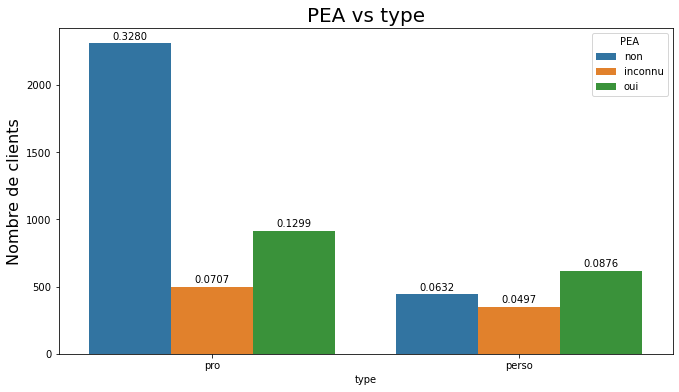

In [78]:
display_countplot(cat_df,'type',"PEA vs type",hue="PEA")

/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


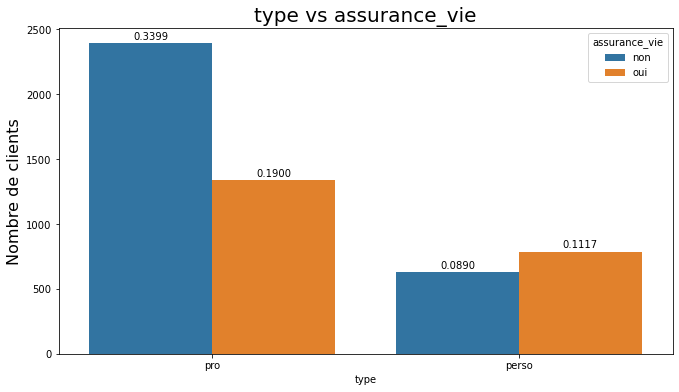

In [79]:
display_countplot(cat_df,'type',"type vs assurance_vie",hue="assurance_vie")

/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


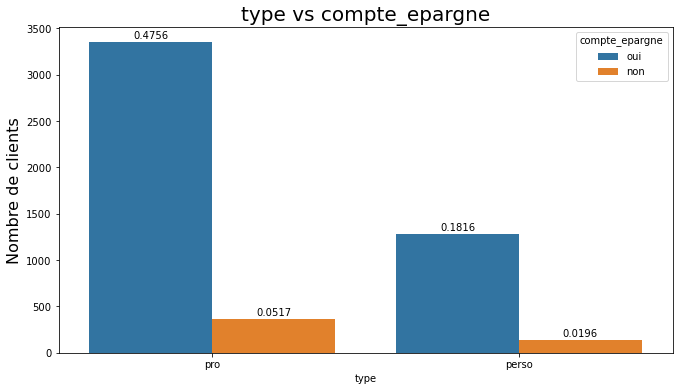

In [80]:
display_countplot(cat_df,'type',"type vs compte_epargne",hue="compte_epargne")

/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


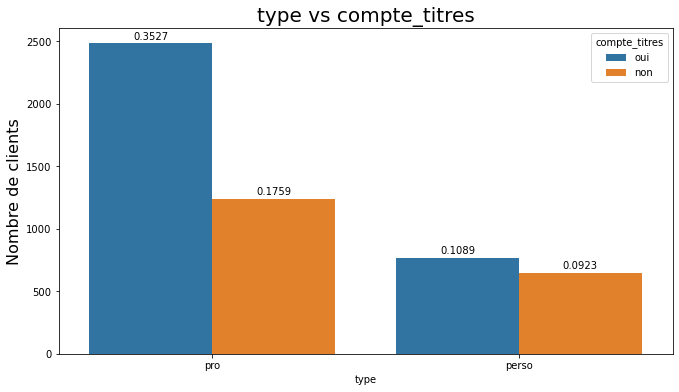

In [81]:
display_countplot(cat_df,'type',"type vs compte_titres",hue="compte_titres")

- Les clients de la banque dont le compte est perso(compte personnel) gagnent assez de d'intérêt et ont un agios de 6mois moins elevé. 

/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


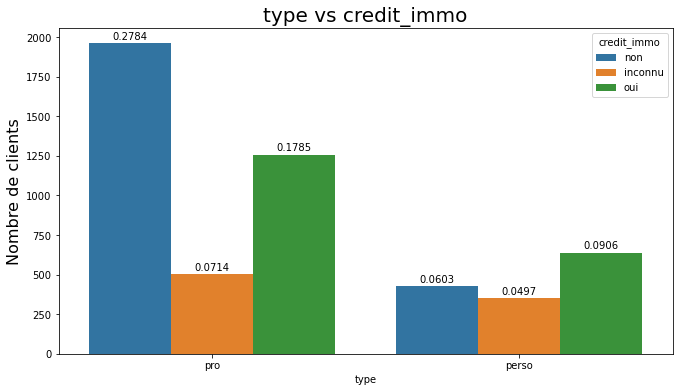

In [82]:
display_countplot(cat_df,'type',"type vs credit_immo",hue="credit_immo")

/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


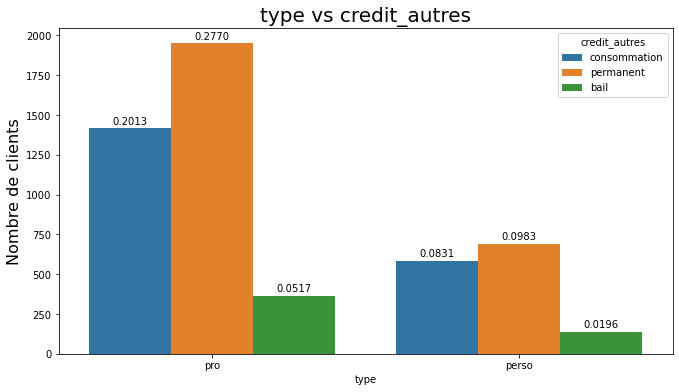

In [83]:
display_countplot(cat_df,'type',"type vs credit_autres",hue="credit_autres")

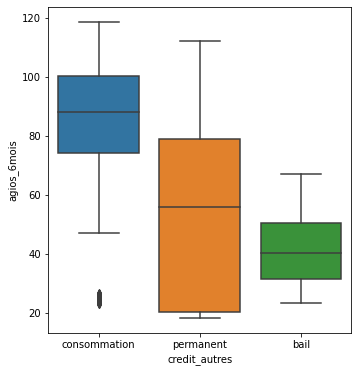

In [84]:
display_boxplot_differenciate_placement(df,['credit_autres'],'agios_6mois')

######  3. Analyse des valeurs manquantes 

In [85]:
def missingValues(df: pd.DataFrame):
    null_df = pd.DataFrame((df.isnull().sum().sort_values(ascending = False)),columns=['null_values'])
    null_df = null_df[null_df.null_values>0]
    plt.figure(figsize=(20,5))
    bar = sns.barplot(null_df.index,null_df.null_values)
    bar.set_title("Nombre de valeurs manquantes par colonnes",fontsize=16)
  
    return list(null_df.index)

/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


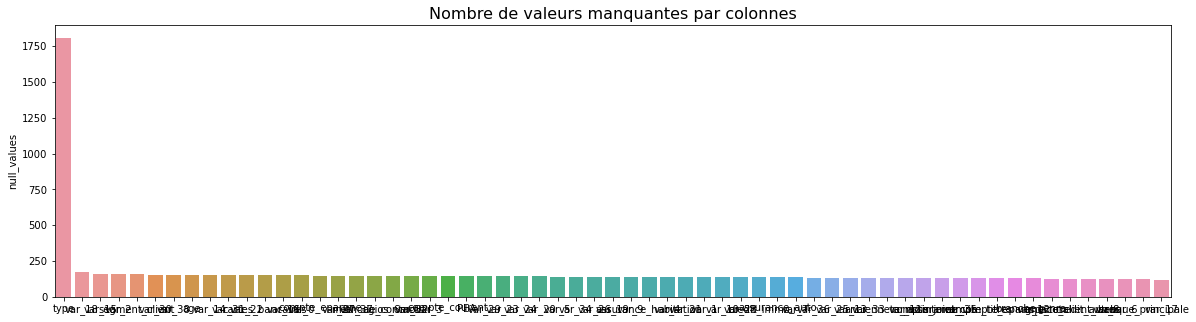

In [86]:
nulls_cols = missingValues(data)

##### Corrélation entre les valeurs manquantes et la variable cible ?

In [87]:
def analyse_missing_data(df: pd.DataFrame, null_cols: list, target: str):
    for col in null_cols:
        if df[df[col].isnull()][target].value_counts()[0] == 0 or df[df[col].isnull()][target].value_counts()[1] == 0: #Vérifier la présence unique de clients churner ou non dès lors qu'une variable contenant des valeurs manquantes apparait
            print(f"Les valeurs manquantes de la colonne {col} ont peut-être un impact sur la variable {target}")
        else:
            print(f"Les valeurs manquantes de la colonne {col} n'influent pas sur la variable : {target}")
   

In [88]:
analyse_missing_data(data,null_cols=nulls_cols,target='churn')

Les valeurs manquantes de la colonne type n'influent pas sur la variable : churn
Les valeurs manquantes de la colonne var_18 n'influent pas sur la variable : churn
Les valeurs manquantes de la colonne var_15 n'influent pas sur la variable : churn
Les valeurs manquantes de la colonne var_2 n'influent pas sur la variable : churn
Les valeurs manquantes de la colonne segment_client n'influent pas sur la variable : churn
Les valeurs manquantes de la colonne var_30 n'influent pas sur la variable : churn
Les valeurs manquantes de la colonne var_38 n'influent pas sur la variable : churn
Les valeurs manquantes de la colonne age n'influent pas sur la variable : churn
Les valeurs manquantes de la colonne var_14 n'influent pas sur la variable : churn
Les valeurs manquantes de la colonne var_31 n'influent pas sur la variable : churn
Les valeurs manquantes de la colonne var_22 n'influent pas sur la variable : churn
Les valeurs manquantes de la colonne cartes_bancaires n'influent pas sur la variable 

- Aucune valeur manquante n'influe sur la target.

In [89]:
df=data.copy()

In [90]:
df=df.dropna(axis=0)

In [91]:
df.shape

(1549, 63)

In [92]:
(df.shape[0]/data.shape[0])*100

21.99346869231861

- En supprimant toutes les valeurs manquantes par ligne , on supprime 21% des lignes . Ce qui reduit la taille du dataset à (1549,63). On ne peut pas supprimer les colonnes aussi car elles toutes contiennent des valeurs manquantes. Nous allons remplacer , toutes les valeurs manquantes par 0.

###### Conclusion stat descriptive

- Dataset de 7043 lignes , 63 colonnes
- Environ 2% de données manquantes
- 69.84% d'attributs numériques dont :
      - 68.25% de type float (variable continue)
      - 1.59% de type int ( variable discret)
   - 30.16% d'attributs catégoriels
- La variable cible est : $churn$ qui est de type object (catégoriel)
- La variable interet_compte_epargne_total doit être convertir en float
- La variable id_client doit être suprimer car elle ne nous apporte aucune information sur le churn
- La variable espace_client_web doit être convertir en object car il s'agit d'une variable binaire (0 ou 1)
- Ramarque: Toutes les variables sauf churn (variable cible) comportent des valeurs manquantes. 
- Le dataset contient beaucoup de valeurs manquantes

Le jeu de donnée n'est pas équilibré il va falloir en tenir compte dans la construction du modèle.
- 73.46% restent dans la banque
- 26.54% quittent la banque 

L'assymétrie de distribution des variables continues implique de potentiel valeurs extrêmes majoritairement à droite.

La variable interet_compte_epargne_total semble être correlée aux variables anciennete_mois et agios_6mois

Les clients qui quittent la banque ont les caractéristiques suivantes:
- Il s'agit des personnes moins agées 
- Appartenant nouvellement à la banque (nouveau client)
- Ayant un agios de 6 mois elevé 
- Ayant un intérêt de compte d'épargne faible 

L'entreprise doit mettre l'accent sur les nouveaux clients ayant une ancienneté supérieure à 10 mois.

Les cartes bancaires premium et basic sont potentiellement plus avantageux aux clients.
Les branches NORD-OUEST, SUD-EST et SUD-OUEST ont une moyenne d'agios de mois 6mois plus elevé que les autres.


Les clients appartenant aux segments [A2,A3,B3,B4,D2,D3] quittent tous la banque.

Les clients qui quittent la banque ont en moyenne 9 à 12 mois d'ancienneté. Et il s'agit principalement les clients moins agés.

- Cette banque n'est pas favorable aux entreprises et aux entrepreneurs. Car lorsqu'ils souscrivent au produit financier (compte_titres, compte_epargne) ils ont un interet faible et un agios elevé , ce qui les poussent à quitter la banque.
- Par contre les clients de la banque dont le compte est perso(compte personnel) gagnent assez d'intérêt et ont un agios de 6mois moins elevé.

Recommandation: proposer aux titulaires de compte professionnel à souscrire au PEA, l'assurance vie 